#Libraries

In [43]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
rcParams['axes.labelpad'] = 20 
rcParams['axes.titlesize'] = 20
rcParams['axes.titlepad'] = 20 
rcParams['figure.figsize'] = 22, 10
rcParams["legend.loc"] = 'upper right'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [2]:
%cd /content/drive/MyDrive/For\ GitHub

/content/drive/MyDrive/For GitHub



#Import Data

In [3]:
chunk = pd.read_csv(
  './Coordinates/Data Coordinates.csv',
  index_col='Titik', #Titik is points in Indonesian
  chunksize=10000,
  dtype=float
)
coordinates = pd.concat(chunk)

In [ ]:
coordinates

X      Y   Latitude  Longitude
Titik                                      
1.0        0.0    0.0  -6.687503  104.97917
2.0        0.0    1.0  -6.687503  105.02084
3.0        0.0    2.0  -6.687503  105.06251
4.0        0.0    3.0  -6.687503  105.10417
5.0        0.0    4.0  -6.687503  105.14584
...        ...    ...        ...        ...
64611.0  127.0  475.0 -11.979170  124.77084
64612.0  127.0  476.0 -11.979170  124.81251
64613.0  127.0  477.0 -11.979170  124.85418
64614.0  127.0  478.0 -11.979170  124.89584
64615.0  127.0  479.0 -11.979170  124.93751

[41164 rows x 4 columns]

In [ ]:
coordinates[['Latitude','Longitude']].describe()

Latitude     Longitude
count  41164.000000  41164.000000
mean     -10.117181    113.961522
std        1.171605      5.882582
min      -11.979170    104.979170
25%      -11.104170    108.770840
50%      -10.187503    113.354170
75%       -9.229170    118.937510
max       -6.687503    125.020840

In [4]:
chunk = pd.read_csv(
  './Predicted Chlorophyll-a.csv',
  parse_dates=['Date'],
  index_col='Date',
  chunksize=10000,
  dtype=float
)
prediction = pd.concat(chunk)

In [ ]:
prediction

1         2         3         4         5         6  \
Date                                                                     
2019-01-01  0.187663  0.187547  0.187244  0.179897  0.167994  0.173857   
2019-01-02  0.177009  0.175851  0.177338  0.170428  0.157466  0.164439   
2019-01-03  0.168111  0.166520  0.169666  0.163358  0.149526  0.156482   
2019-01-04  0.167244  0.167306  0.170508  0.165573  0.152258  0.153548   
2019-01-05  0.190613  0.191788  0.196790  0.192848  0.180050  0.181301   
...              ...       ...       ...       ...       ...       ...   
2020-12-27  0.152790  0.151602  0.155028  0.150685  0.137450  0.143067   
2020-12-28  0.146659  0.145294  0.150905  0.146861  0.133731  0.139999   
2020-12-29  0.145139  0.143755  0.150407  0.146420  0.132960  0.139047   
2020-12-30  0.144373  0.143011  0.150303  0.146371  0.132641  0.138300   
2020-12-31  0.143463  0.142136  0.149834  0.146006  0.132224  0.137511   

                   7         8         9        10  ...     41155     41156  \
Date                                                ...                       
2019-01-01  0.175223  0.195395  0.242625  0.227716  ...  0.094893  0.095752   
2019-01-02  0.166984  0.185383  0.229075  0.214819  ...  0.093798  0.094721   
2019-01-03  0.159885  0.176961  0.218207  0.203812  ...  0.096752  0.097691   
2019-01-04  0.163038  0.188617  0.243125  0.234117  ...  0.095340  0.096308   
2019-01-05  0.196600  0.234089  0.315753  0.354255  ...  0.095606  0.096512   
...              ...       ...       ...       ...  ...       ...       ...   
2020-12-27  0.146463  0.164510  0.205631  0.188194  ...  0.106089  0.107084   
2020-12-28  0.146011  0.165382  0.208794  0.204923  ...  0.109332  0.110311   
2020-12-29  0.145581  0.164548  0.207142  0.205163  ...  0.106023  0.107039   
2020-12-30  0.145024  0.163511  0.205215  0.203777  ...  0.106653  0.107691   
2020-12-31  0.144478  0.162861  0.204309  0.204665  ...  0.103579  0.104631   

               41157     41158     41159     41160     41161     41162  \
Date                                                                     
2019-01-01  0.102060  0.105688  0.112385  0.114764  0.122485  0.128279   
2019-01-02  0.101016  0.104559  0.111263  0.113630  0.121317  0.127087   
2019-01-03  0.103921  0.107354  0.114154  0.116555  0.124277  0.130119   
2019-01-04  0.102550  0.105959  0.112763  0.115138  0.122881  0.128687   
2019-01-05  0.102783  0.106322  0.113080  0.115458  0.123235  0.129045   
...              ...       ...       ...       ...       ...       ...   
2020-12-27  0.113152  0.116384  0.123393  0.125986  0.133543  0.139512   
2020-12-28  0.116326  0.119520  0.126601  0.129227  0.136830  0.142882   
2020-12-29  0.113098  0.116289  0.123337  0.125907  0.133563  0.139555   
2020-12-30  0.113721  0.116847  0.123932  0.126488  0.134177  0.140202   
2020-12-31  0.110701  0.113864  0.120904  0.123394  0.131110  0.137081   

               41163     41164  
Date                            
2019-01-01  0.129387  0.136472  
2019-01-02  0.128195  0.135270  
2019-01-03  0.131306  0.138455  
2019-01-04  0.129879  0.137027  
2019-01-05  0.130203  0.137315  
...              ...       ...  
2020-12-27  0.140483  0.147472  
2020-12-28  0.143911  0.150965  
2020-12-29  0.140644  0.147728  
2020-12-30  0.141372  0.148526  
2020-12-31  0.138272  0.145437  

[731 rows x 41164 columns]

In [5]:
chunk = pd.read_csv(
  './Actual Chlorophyll-a.csv',
  parse_dates=['Date'],
  index_col='Date',
  chunksize=10000,
  dtype=float
)
actual = pd.concat(chunk)

In [ ]:
actual

1         2         3         4         5         6  \
Date                                                                     
2019-01-01  0.124138  0.126573  0.130160  0.136463  0.145875  0.149075   
2019-01-02  0.123479  0.133631  0.144565  0.153183  0.156994  0.158057   
2019-01-03  0.123091  0.133479  0.145073  0.154175  0.156471  0.156393   
2019-01-04  0.115016  0.117909  0.118747  0.134362  0.157948  0.163944   
2019-01-05  0.113295  0.124575  0.142075  0.150108  0.153067  0.171264   
...              ...       ...       ...       ...       ...       ...   
2020-12-27  0.147839  0.152234  0.154180  0.160983  0.160300  0.151780   
2020-12-28  0.148308  0.152504  0.154303  0.160533  0.149957  0.162143   
2020-12-29  0.152718  0.157243  0.158452  0.163599  0.163976  0.177443   
2020-12-30  0.163495  0.155833  0.158637  0.152889  0.179467  0.172925   
2020-12-31  0.151081  0.154483  0.168978  0.163657  0.168546  0.174581   

                   7         8         9        10  ...     41155     41156  \
Date                                                ...                       
2019-01-01  0.170018  0.172322  0.199724  0.217087  ...  0.091100  0.090959   
2019-01-02  0.187072  0.203290  0.220164  0.235944  ...  0.108014  0.106953   
2019-01-03  0.188818  0.207216  0.226255  0.289423  ...  0.087605  0.086997   
2019-01-04  0.164744  0.195548  0.223741  0.686393  ...  0.090867  0.090552   
2019-01-05  0.178941  0.195504  0.233085  0.341120  ...  0.106365  0.105488   
...              ...       ...       ...       ...  ...       ...       ...   
2020-12-27  0.165163  0.180003  0.170105  0.189764  ...  0.129040  0.139918   
2020-12-28  0.164781  0.179236  0.158551  0.176152  ...  0.117925  0.125234   
2020-12-29  0.168414  0.171267  0.173691  0.180420  ...  0.133563  0.136209   
2020-12-30  0.179229  0.186269  0.194630  0.199971  ...  0.123165  0.125729   
2020-12-31  0.194306  0.189414  0.198732  0.218319  ...  0.098661  0.101605   

               41157     41158     41159     41160     41161     41162  \
Date                                                                     
2019-01-01  0.091558  0.091217  0.091947  0.091571  0.087715  0.088617   
2019-01-02  0.107895  0.106780  0.108763  0.106782  0.103553  0.102925   
2019-01-03  0.087104  0.086377  0.086912  0.086022  0.084566  0.084254   
2019-01-04  0.090476  0.090981  0.092623  0.094059  0.095084  0.097435   
2019-01-05  0.104281  0.104712  0.108321  0.110260  0.111076  0.114656   
...              ...       ...       ...       ...       ...       ...   
2020-12-27  0.142549  0.142842  0.144811  0.146770  0.147460  0.142472   
2020-12-28  0.126423  0.126449  0.127119  0.127729  0.127568  0.125306   
2020-12-29  0.141532  0.133422  0.127577  0.124385  0.125598  0.129725   
2020-12-30  0.128973  0.124458  0.121011  0.119595  0.121104  0.124386   
2020-12-31  0.104233  0.107388  0.109444  0.112785  0.117605  0.121885   

               41163     41164  
Date                            
2019-01-01  0.089557  0.091419  
2019-01-02  0.103450  0.103404  
2019-01-03  0.084523  0.084686  
2019-01-04  0.100284  0.102637  
2019-01-05  0.118128  0.120525  
...              ...       ...  
2020-12-27  0.147726  0.145792  
2020-12-28  0.127465  0.127289  
2020-12-29  0.128595  0.133622  
2020-12-30  0.124974  0.128435  
2020-12-31  0.125360  0.129977  

[731 rows x 41164 columns]

Now we can try to visualize the chlorophyll-a concentration at specific location

In [ ]:
def plot(i):
  col = coordinates.index.values
  col = np.where(coordinates.index.values == i)[0][0]
  sns.lineplot(x = actual.index, y = actual[str(col+1)], label='Actual')
  sns.lineplot(x = prediction.index, y = prediction[str(col+1)], label='Prediction')
  plt.xlabel('Date')
  plt.ylabel('Chlorophyll-a (mg/$\mathregular{m^3}$)')
  plt.ylim(0,25)
  plt.title('Chlorophyll-a concentration in the southern waters of java - east nusa tenggara \n ({} , {})'.format(str(coordinates[i:i]['Latitude'].values)[1:9],
                                                                                                                  str(coordinates[i:i]['Longitude'].values)[1:9]),
            fontsize=30)
  plt.legend(prop={"size":30})
  plt.show()

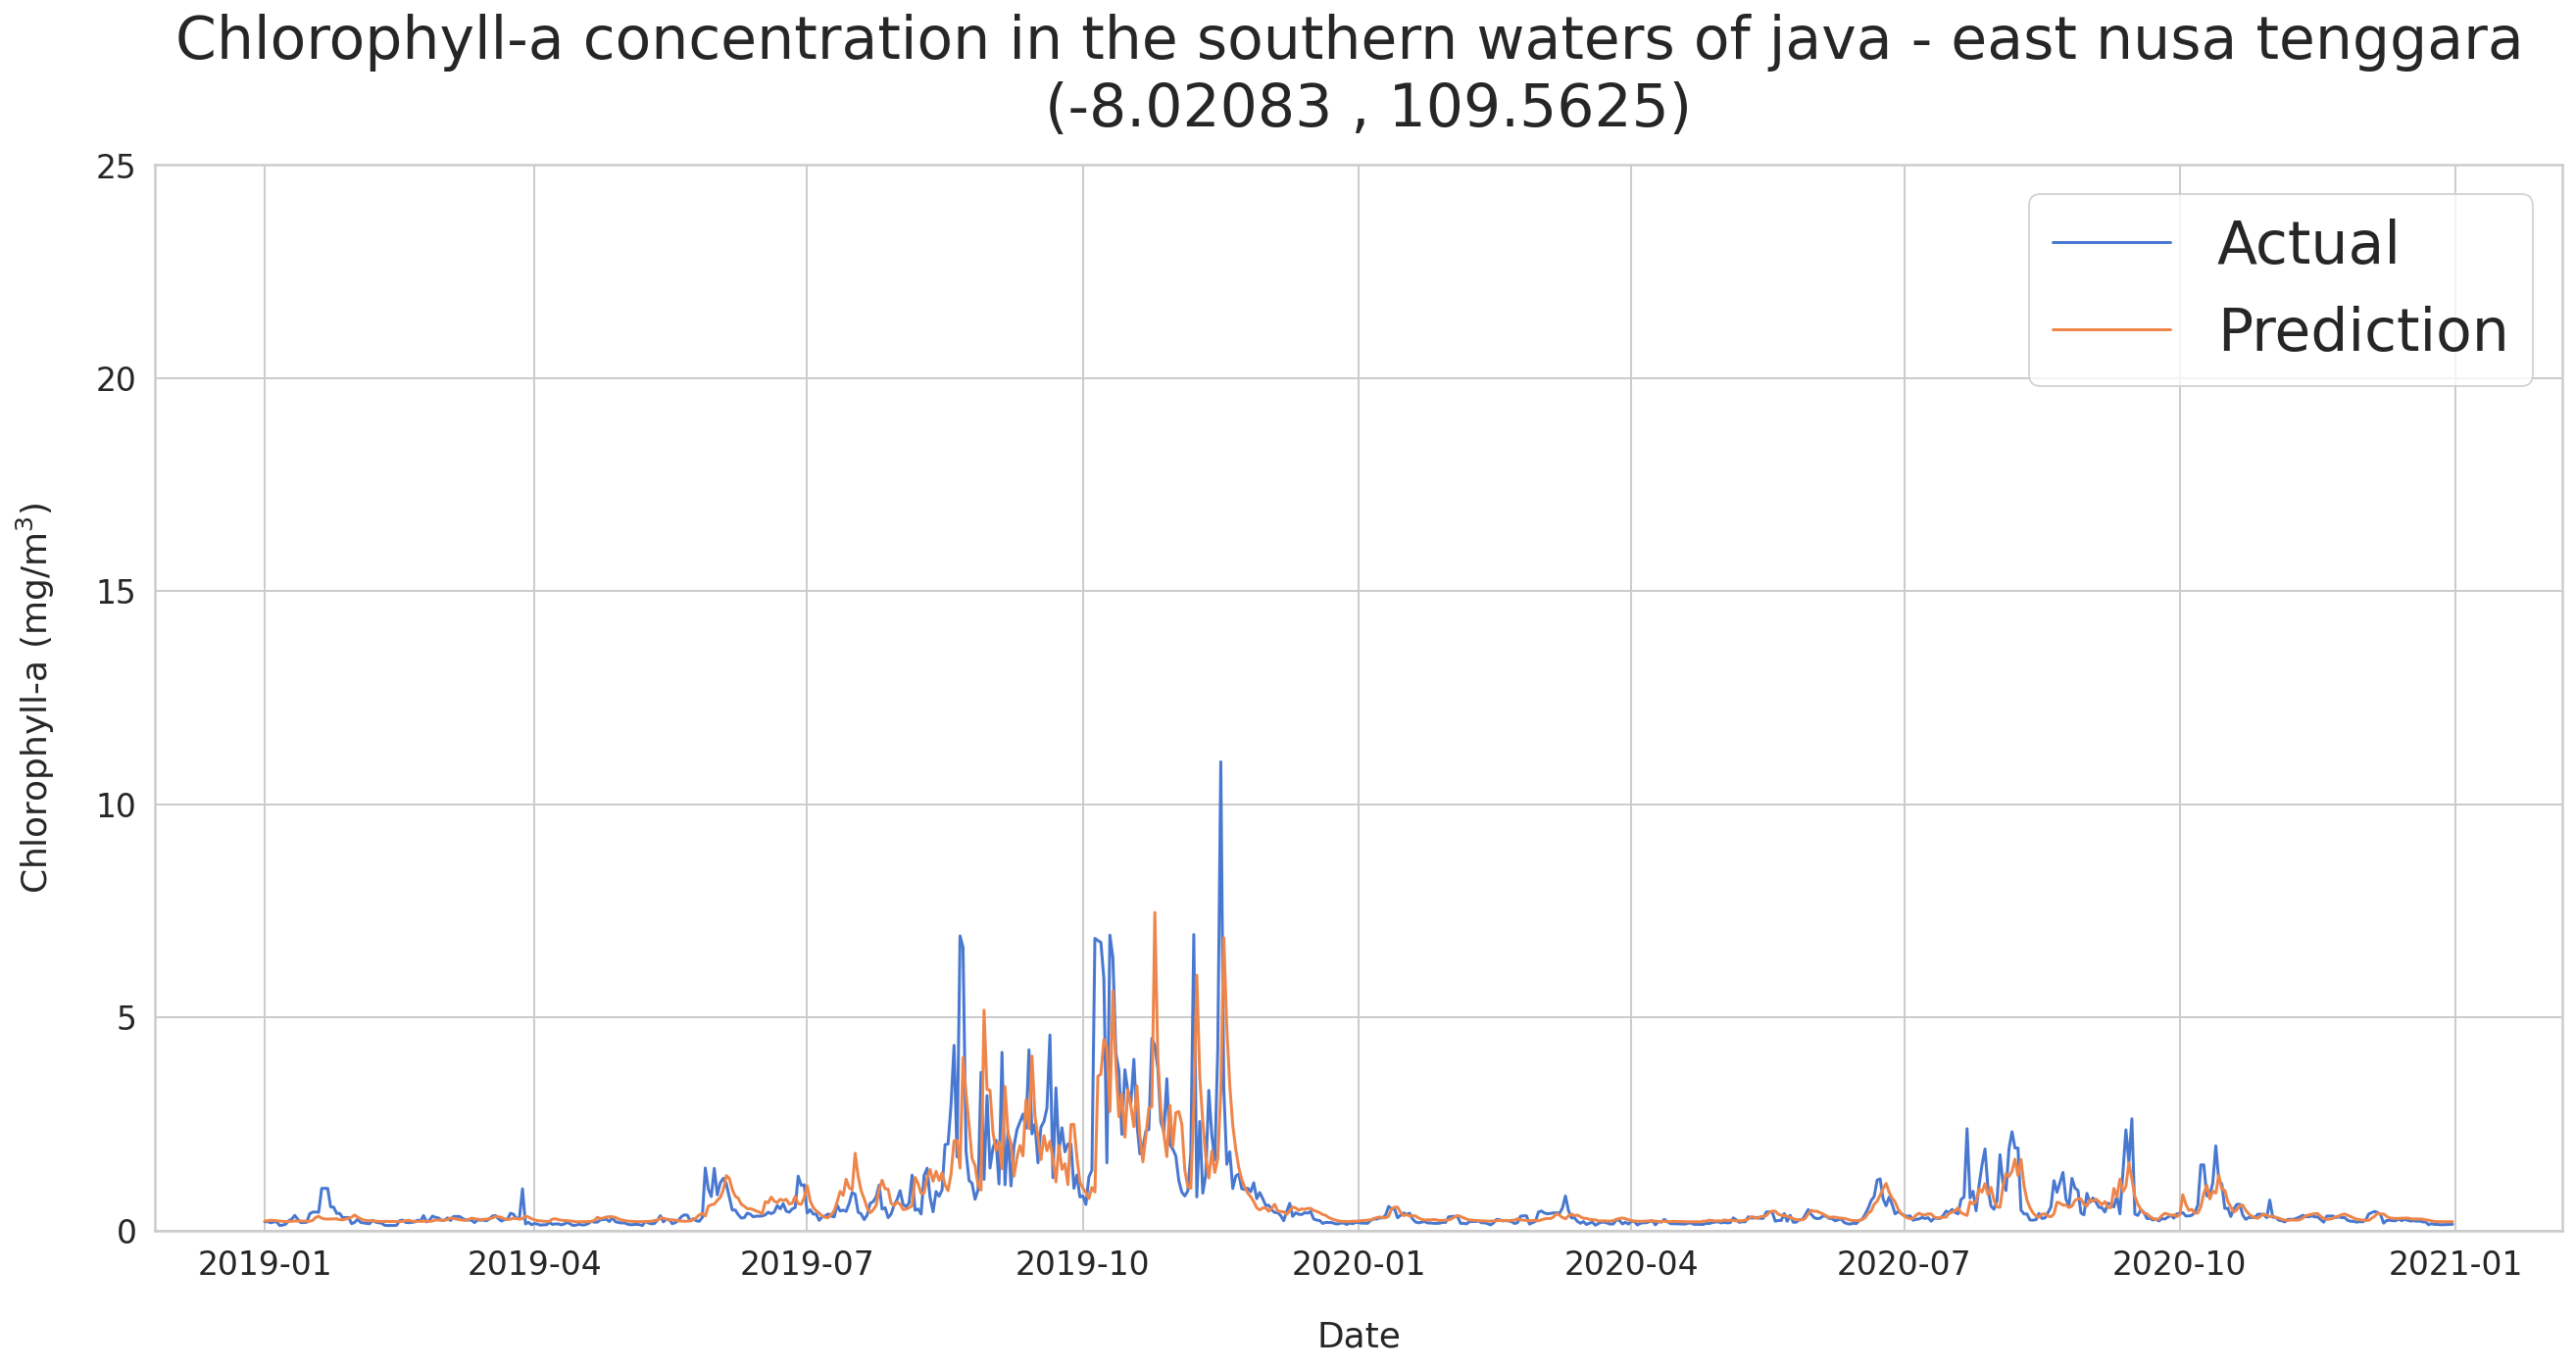

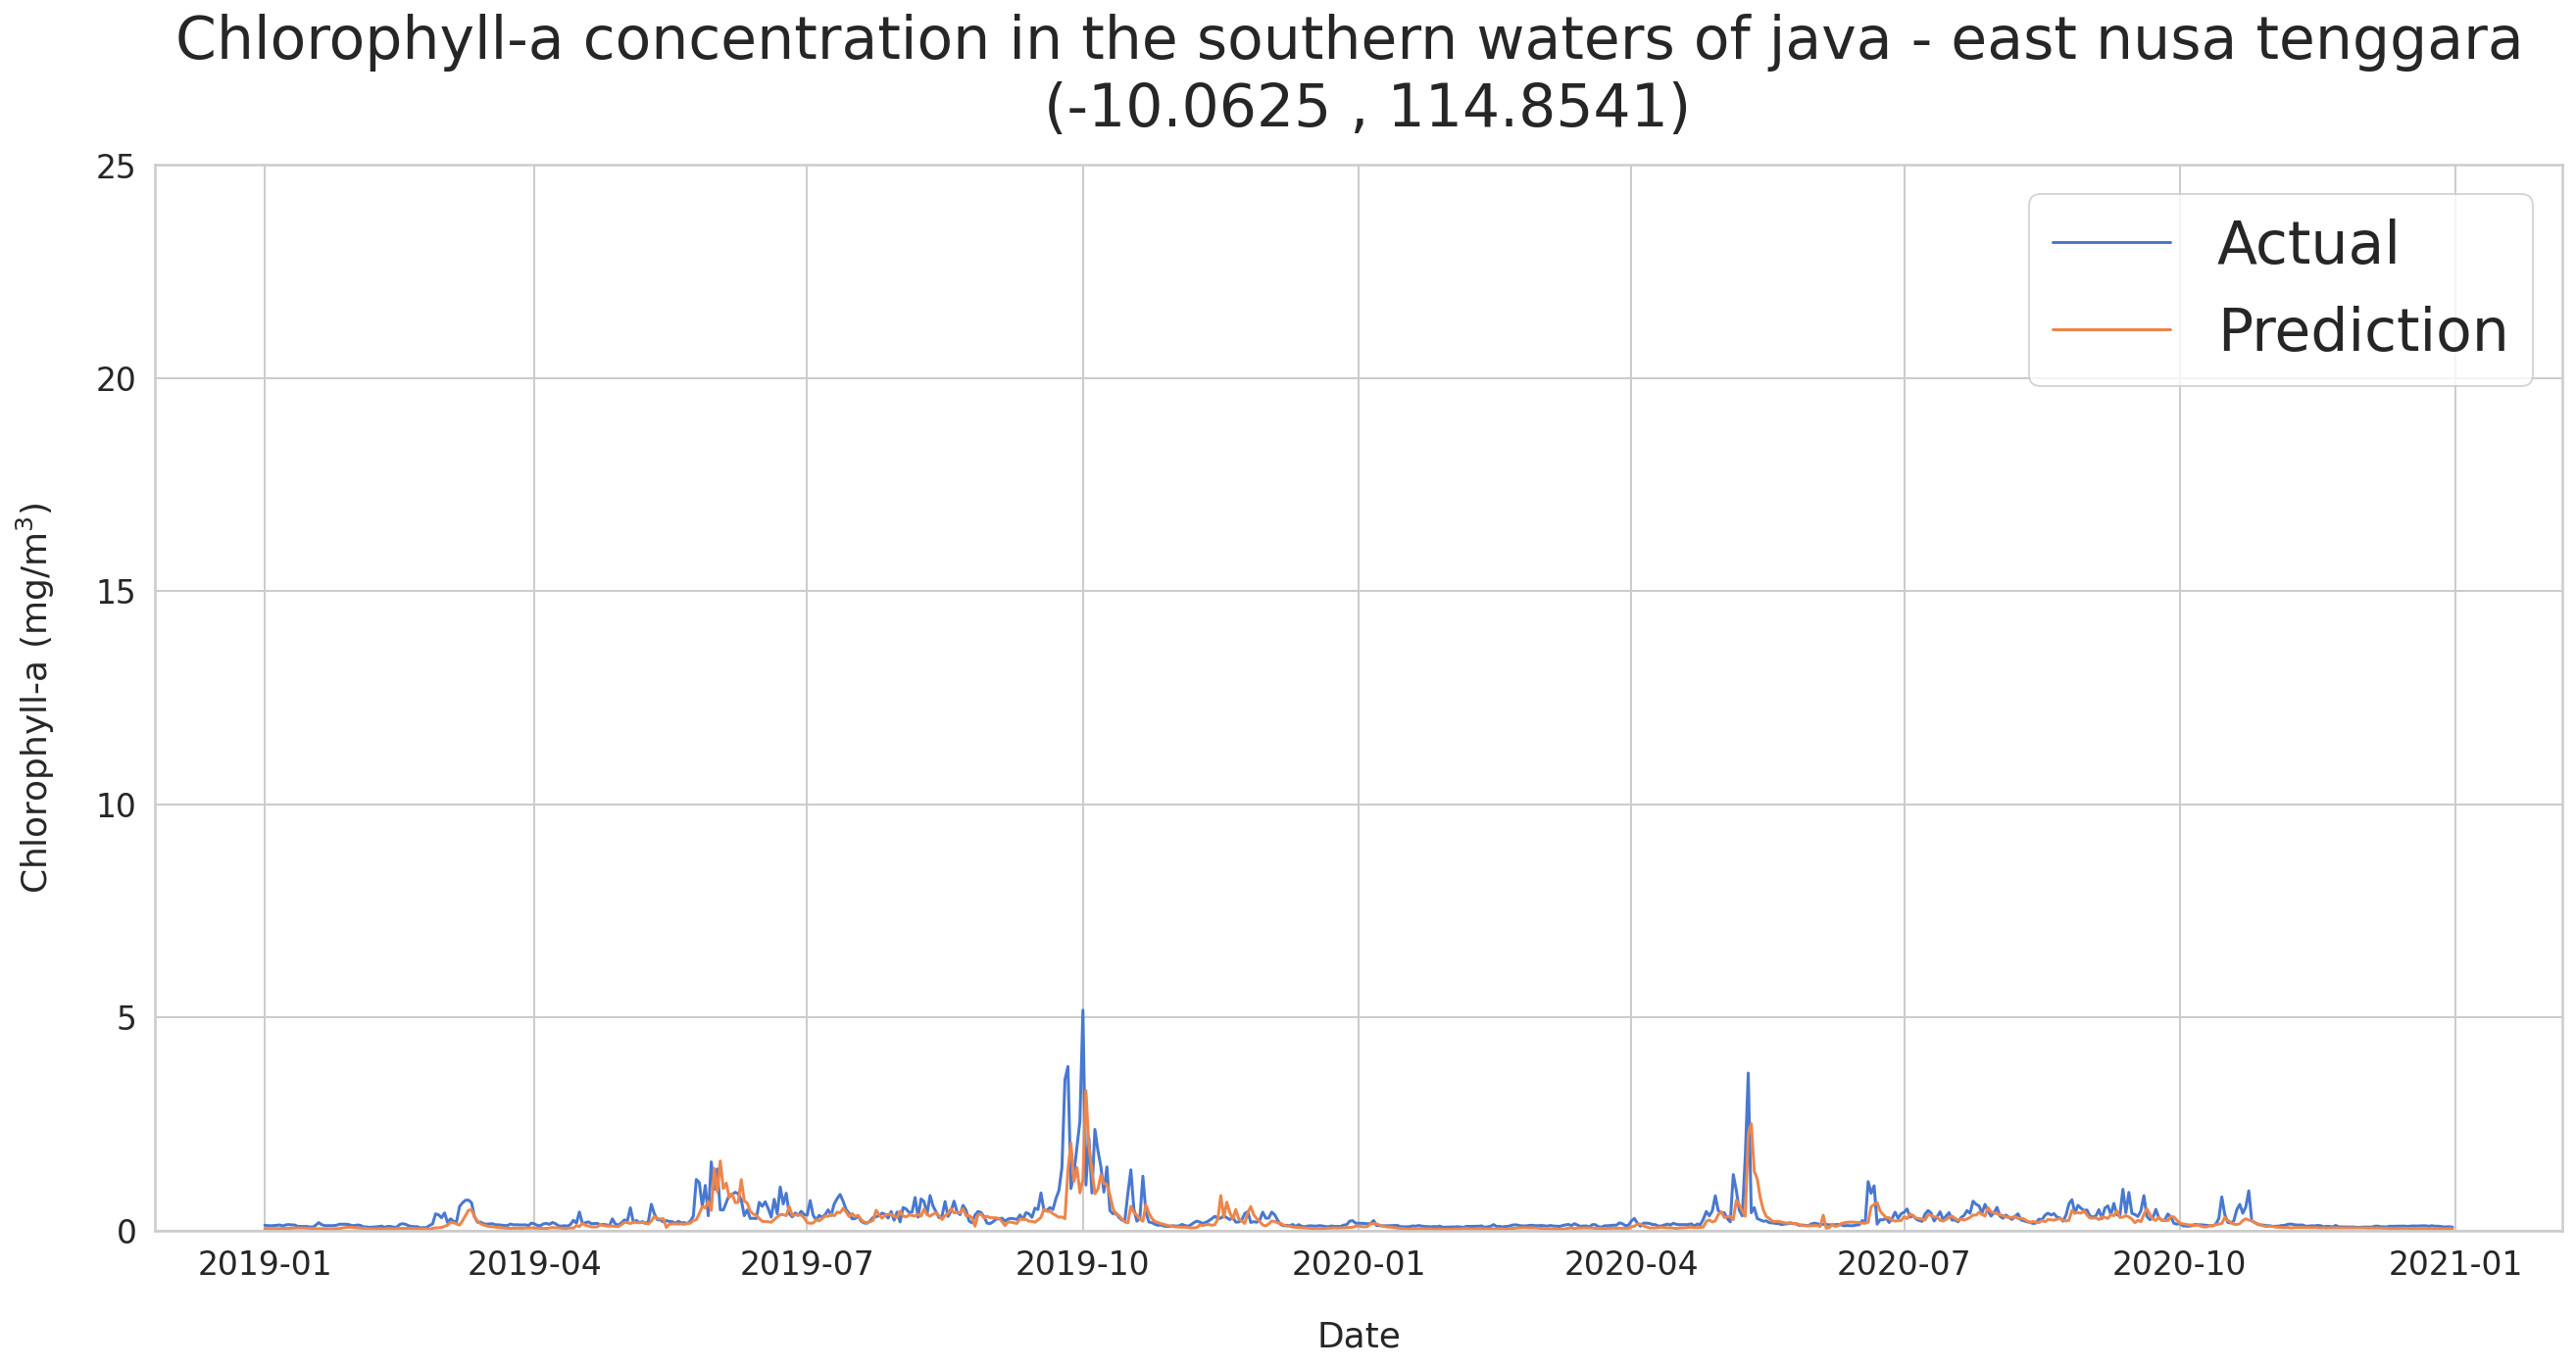

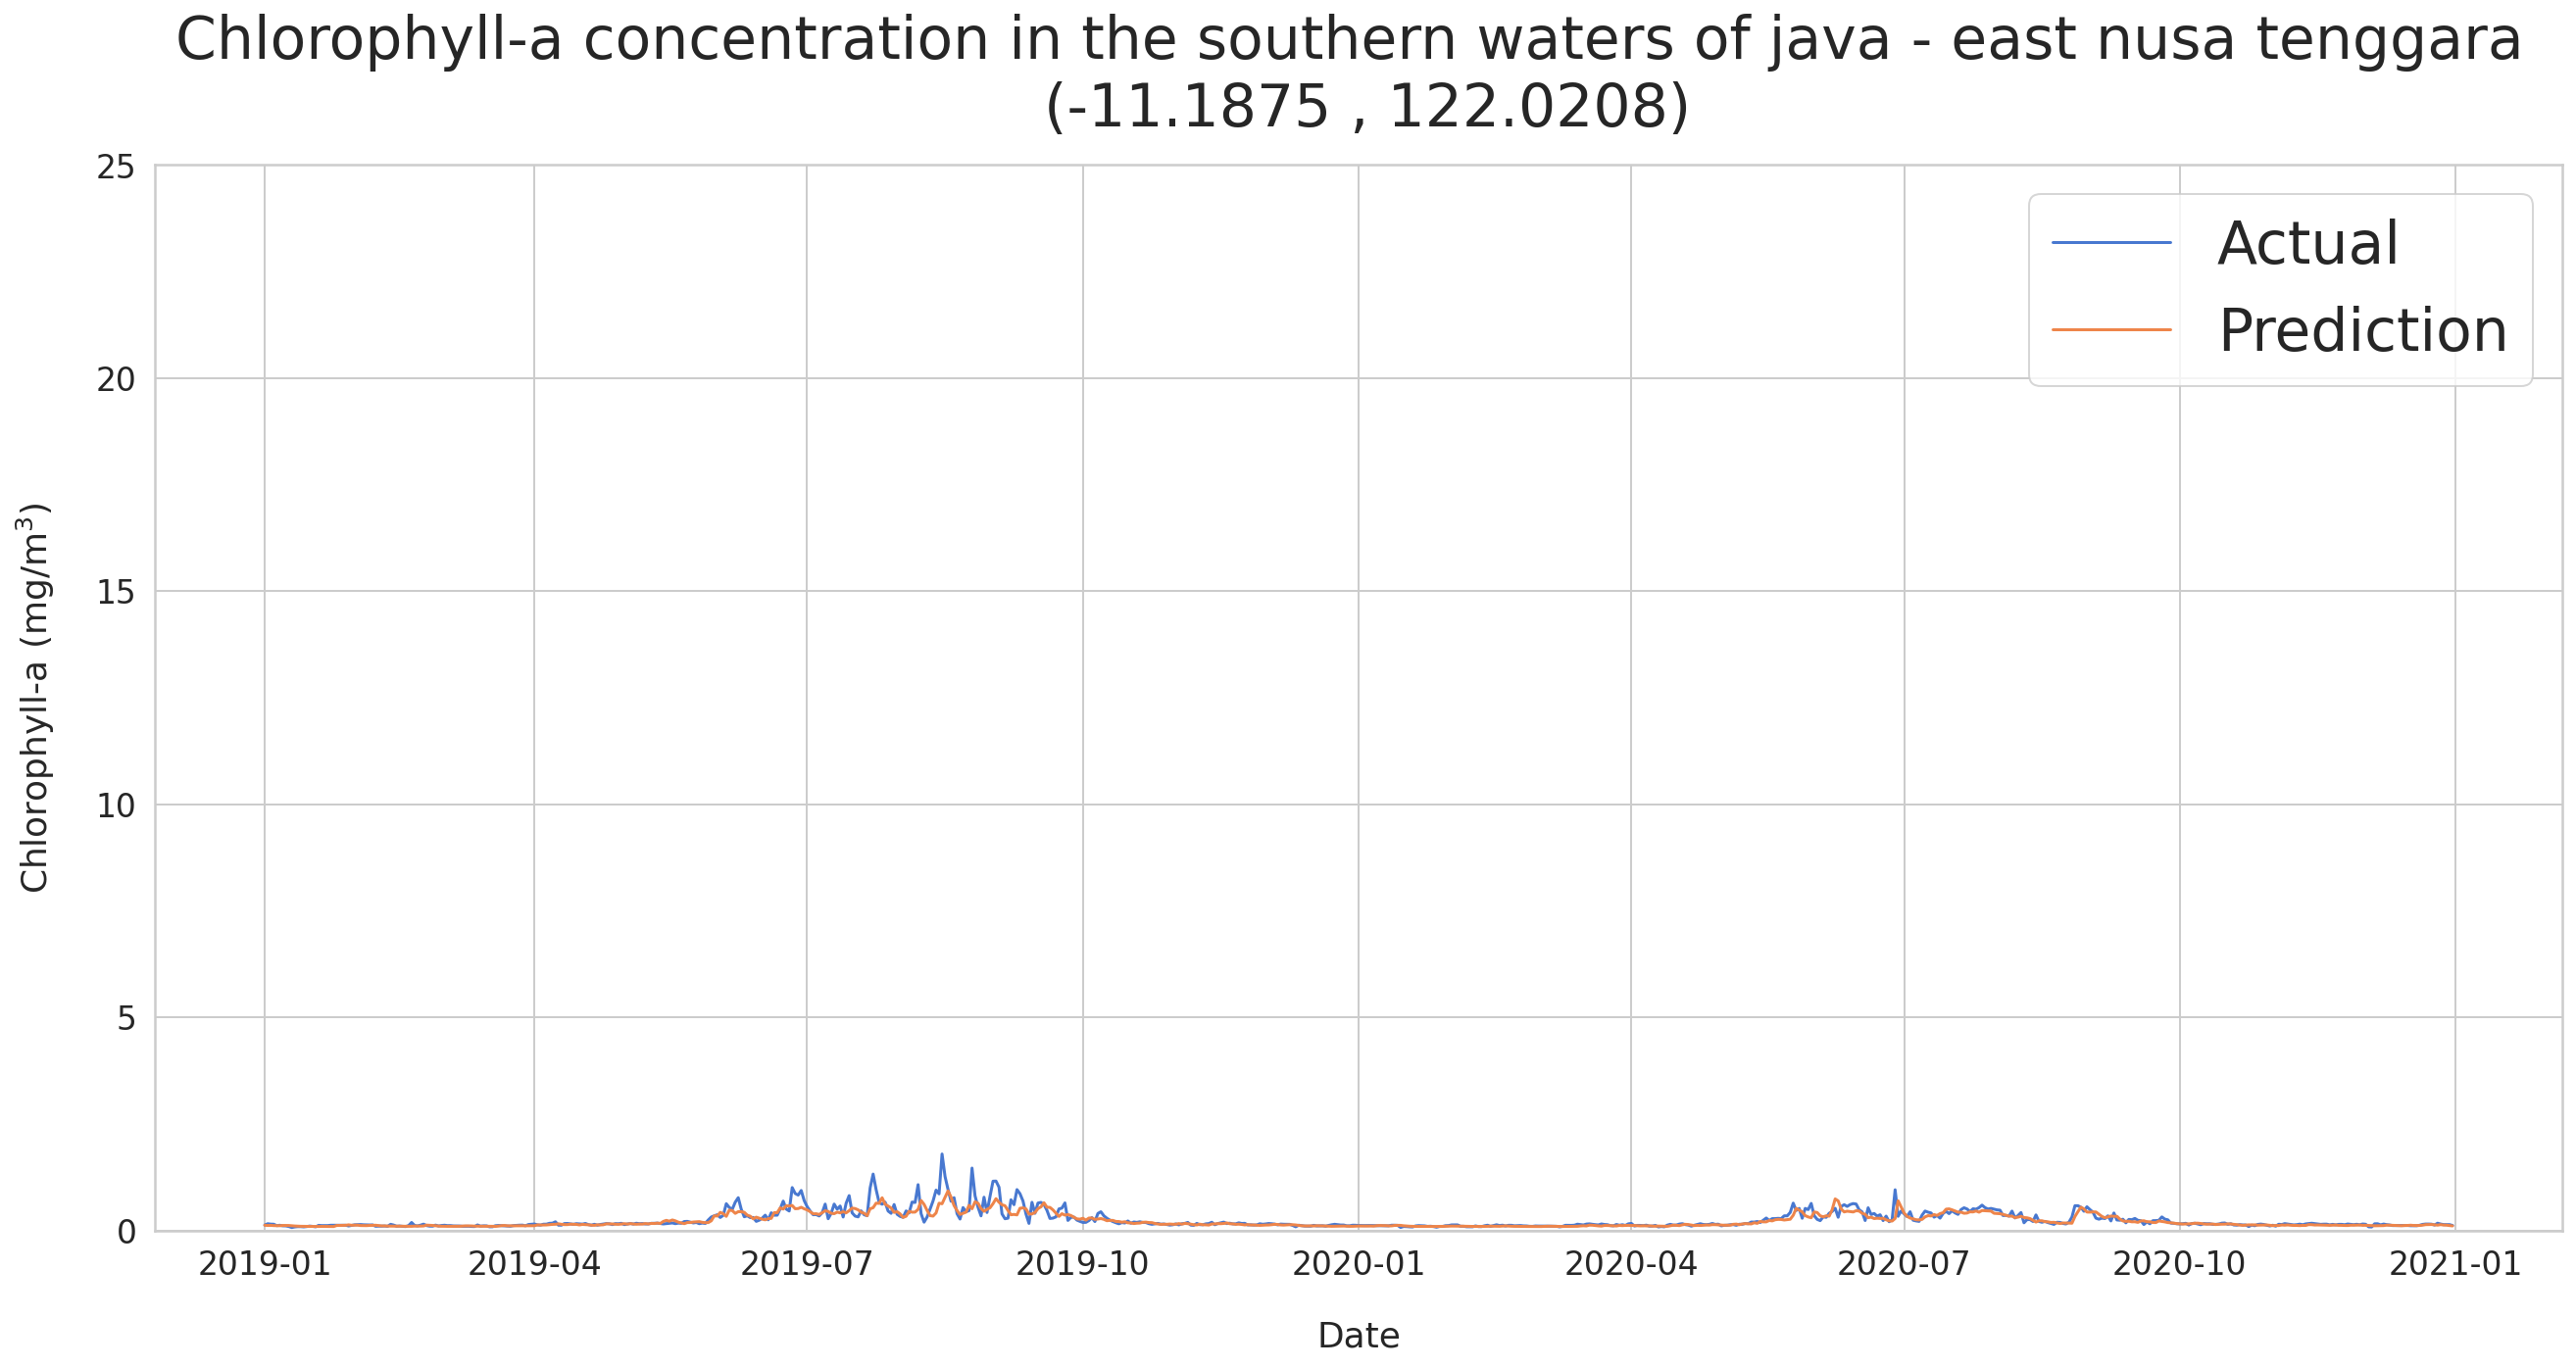

In [ ]:
for i in [16271, 41143, 54950]:
  plot(i)

#Klorofil in 4 seasons

1. DJF -> December, Januari, February
2. MAM -> March, April, May
3. JJA -> June, July, August
4. SON -> September, October, November

In [16]:
season = ['DJF 2019','MAM 2019','JJA 2019','SON 2019','DJF 2020','MAM 2020','JJA 2020','SON 2020']

In [6]:
#Seasonal prediction in 2019
djf_2019_pred = pd.DataFrame(prediction['2019-01':'2019-02'])
mam_2019_pred = pd.DataFrame(prediction['2019-03':'2019-05'])
jja_2019_pred = pd.DataFrame(prediction['2019-06':'2019-08'])
son_2019_pred = pd.DataFrame(prediction['2019-09':'2019-11'])

#Seasonal prediction in 2020
djf_2020_pred = pd.DataFrame(prediction['2019-12':'2020-02'])
mam_2020_pred = pd.DataFrame(prediction['2020-03':'2020-05'])
jja_2020_pred = pd.DataFrame(prediction['2020-06':'2020-08'])
son_2020_pred = pd.DataFrame(prediction['2020-09':'2020-11'])

In [7]:
#Seasonal Actual in 2019
djf_2019_actual = pd.DataFrame(actual['2019-01':'2019-02'])
mam_2019_actual = pd.DataFrame(actual['2019-03':'2019-05'])
jja_2019_actual = pd.DataFrame(actual['2019-06':'2019-08'])
son_2019_actual = pd.DataFrame(actual['2019-09':'2019-11'])

#Seasonal Actual in 2020
djf_2020_actual = pd.DataFrame(actual['2019-12':'2020-02'])
mam_2020_actual = pd.DataFrame(actual['2020-03':'2020-05'])
jja_2020_actual = pd.DataFrame(actual['2020-06':'2020-08'])
son_2020_actual = pd.DataFrame(actual['2020-09':'2020-11'])

In [8]:
season_pred = coordinates.copy()

season_pred['DJF 2019'] = djf_2019_pred.mean().values
season_pred['MAM 2019'] = mam_2019_pred.mean().values
season_pred['JJA 2019'] = jja_2019_pred.mean().values
season_pred['SON 2019'] = son_2019_pred.mean().values

season_pred['DJF 2020'] = djf_2020_pred.mean().values
season_pred['MAM 2020'] = mam_2020_pred.mean().values
season_pred['JJA 2020'] = jja_2020_pred.mean().values
season_pred['SON 2020'] = son_2020_pred.mean().values

In [ ]:
season_pred

X      Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  \
Titik                                                                       
1.0        0.0    0.0  -6.687503  104.97917  0.216468  0.260755  0.616715   
2.0        0.0    1.0  -6.687503  105.02084  0.215912  0.259948  0.678233   
3.0        0.0    2.0  -6.687503  105.06251  0.217817  0.260297  0.758941   
4.0        0.0    3.0  -6.687503  105.10417  0.209937  0.248979  0.768741   
5.0        0.0    4.0  -6.687503  105.14584  0.194044  0.231440  0.662942   
...        ...    ...        ...        ...       ...       ...       ...   
64611.0  127.0  475.0 -11.979170  124.77084  0.119171  0.142480  0.254470   
64612.0  127.0  476.0 -11.979170  124.81251  0.126881  0.150393  0.263790   
64613.0  127.0  477.0 -11.979170  124.85418  0.132761  0.156785  0.272771   
64614.0  127.0  478.0 -11.979170  124.89584  0.133895  0.157840  0.273425   
64615.0  127.0  479.0 -11.979170  124.93751  0.141001  0.164879  0.279912   

         SON 2019  DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                                      
1.0      0.908451  0.465107  0.246442  0.328360  0.279753  
2.0      1.032752  0.469648  0.247681  0.330740  0.280320  
3.0      1.135191  0.475135  0.250002  0.333890  0.280494  
4.0      1.154378  0.465262  0.239788  0.323124  0.267912  
5.0      0.932207  0.432176  0.223717  0.302487  0.248723  
...           ...       ...       ...       ...       ...  
64611.0  0.164957  0.121824  0.137942  0.221221  0.143345  
64612.0  0.172882  0.129574  0.145887  0.229849  0.151029  
64613.0  0.179676  0.135503  0.152183  0.237933  0.157360  
64614.0  0.180179  0.136606  0.153225  0.238279  0.158148  
64615.0  0.186831  0.143665  0.160219  0.244572  0.164941  

[41164 rows x 12 columns]

In [9]:
season_actual = coordinates.copy()

season_actual['DJF 2019'] = djf_2019_actual.mean().values
season_actual['MAM 2019'] = mam_2019_actual.mean().values
season_actual['JJA 2019'] = jja_2019_actual.mean().values
season_actual['SON 2019'] = son_2019_actual.mean().values

season_actual['DJF 2020'] = djf_2020_actual.mean().values
season_actual['MAM 2020'] = mam_2020_actual.mean().values
season_actual['JJA 2020'] = jja_2020_actual.mean().values
season_actual['SON 2020'] = son_2020_actual.mean().values

In [ ]:
season_actual

X      Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  \
Titik                                                                       
1.0        0.0    0.0  -6.687503  104.97917  0.235333  0.264256  0.715411   
2.0        0.0    1.0  -6.687503  105.02084  0.234035  0.265219  0.745111   
3.0        0.0    2.0  -6.687503  105.06251  0.235093  0.266959  0.803758   
4.0        0.0    3.0  -6.687503  105.10417  0.234888  0.268919  0.827765   
5.0        0.0    4.0  -6.687503  105.14584  0.238663  0.276619  0.787584   
...        ...    ...        ...        ...       ...       ...       ...   
64611.0  127.0  475.0 -11.979170  124.77084  0.109549  0.129375  0.250021   
64612.0  127.0  476.0 -11.979170  124.81251  0.109607  0.129096  0.252458   
64613.0  127.0  477.0 -11.979170  124.85418  0.110857  0.129510  0.254904   
64614.0  127.0  478.0 -11.979170  124.89584  0.110071  0.129201  0.260147   
64615.0  127.0  479.0 -11.979170  124.93751  0.110008  0.131728  0.266517   

         SON 2019  DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                                      
1.0      1.049654  0.629667  0.263558  0.385438  0.276368  
2.0      1.226310  0.650233  0.258327  0.390281  0.284324  
3.0      1.373188  0.615174  0.262490  0.388856  0.292464  
4.0      1.407288  0.586709  0.269550  0.383783  0.294074  
5.0      1.285134  0.587354  0.278683  0.383089  0.294436  
...           ...       ...       ...       ...       ...  
64611.0  0.138103  0.108420  0.122337  0.199693  0.120739  
64612.0  0.137763  0.109859  0.124419  0.207338  0.122064  
64613.0  0.137532  0.111994  0.127638  0.217337  0.122819  
64614.0  0.138133  0.113895  0.129471  0.216338  0.120756  
64615.0  0.137635  0.115577  0.133509  0.217321  0.119365  

[41164 rows x 12 columns]

In [ ]:
season_pred.to_csv('./Seasonal Chlorophyll-a prediction.csv')
season_actual.to_csv('./Seasonal Chlorophyll-a actual.csv')

In [ ]:
season_desc = pd.DataFrame(columns=['Season','Mean Actual','Mean Prediction',
                                    'Max Actual','Max Prediction', 'Min Actual','Min Prediction'])

season_desc['Season'] = season
season_desc = season_desc.set_index('Season')

season_desc['Mean Actual'] = season_actual[season].mean()
season_desc['Mean Prediction'] = season_pred[season].mean()

season_desc['Max Actual'] = season_actual[season].max()
season_desc['Max Prediction'] = season_pred[season].max()

season_desc['Min Actual'] = season_actual[season].min()
season_desc['Min Prediction'] = season_pred[season].min()

season_desc = season_desc.round(3)
season_desc

Mean Actual  Mean Prediction  Max Actual  Max Prediction  \
Season                                                               
DJF 2019        0.111            0.107       1.793           1.454   
MAM 2019        0.177            0.165       2.676           2.006   
JJA 2019        0.489            0.445       8.518           7.455   
SON 2019        0.416            0.388       8.803           9.301   
DJF 2020        0.134            0.129       1.987           2.040   
MAM 2020        0.158            0.150       1.686           1.746   
JJA 2020        0.308            0.294       3.807           3.455   
SON 2020        0.240            0.235       3.701           3.209   

          Min Actual  Min Prediction  
Season                                
DJF 2019       0.064           0.027  
MAM 2019       0.099           0.035  
JJA 2019       0.181           0.066  
SON 2019       0.122           0.041  
DJF 2020       0.076           0.030  
MAM 2020       0.083           0.032  
JJA 2020       0.134           0.061  
SON 2020       0.113           0.050

In [ ]:
def plot_korelasi(i):
  from sklearn.metrics import r2_score
  r2 = r2_score(season_actual[i].values, season_pred[i].values)
  col = i
  plt.plot(season_actual[i], season_pred[i], 'b.')
  plt.plot(season_actual[i], season_actual[i], 'r-')
  plt.xlabel('Predicted Chlorphyll-a (mg/$\mathregular{m^3}$)')
  plt.ylabel('Actual Chlorphyll-a (mg/$\mathregular{m^3}$)')
  plt.title('Correlation between actual and prediction {} \n  (R2 : {:.2f})'.format(i, r2),
            fontsize=30)
  plt.savefig(r'./Graphs/Correlation/{}.jpg'.format(i))
  plt.show()
  plt.clf()

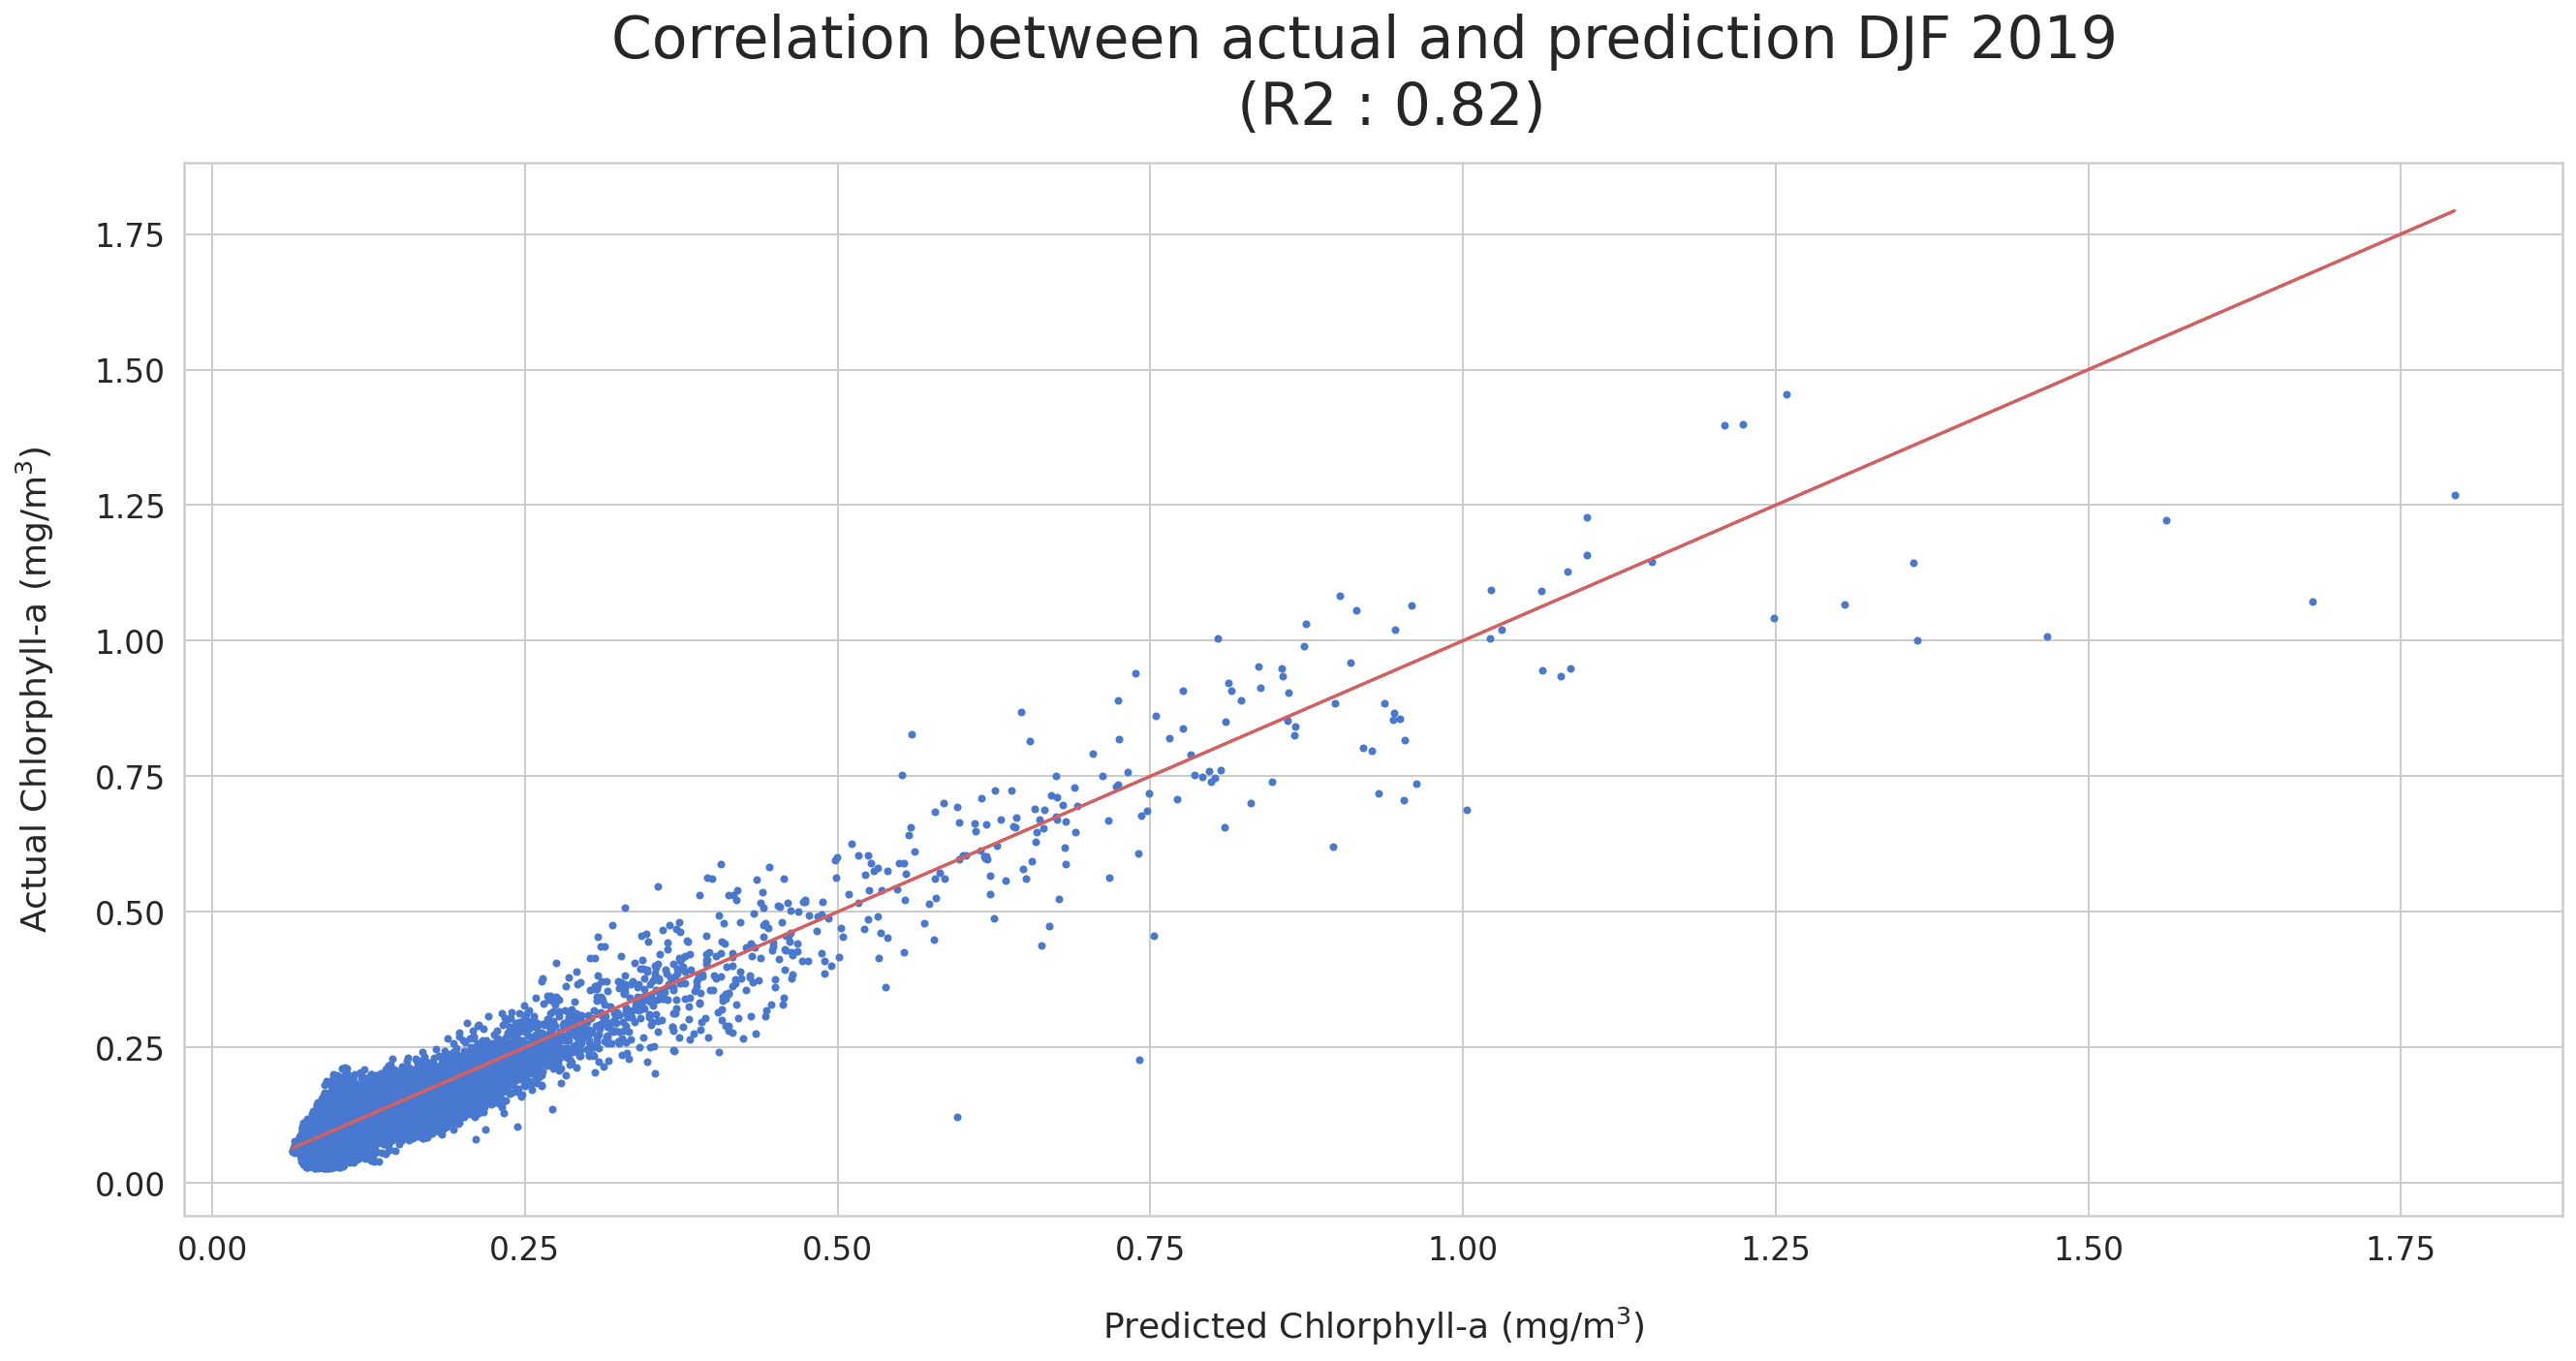

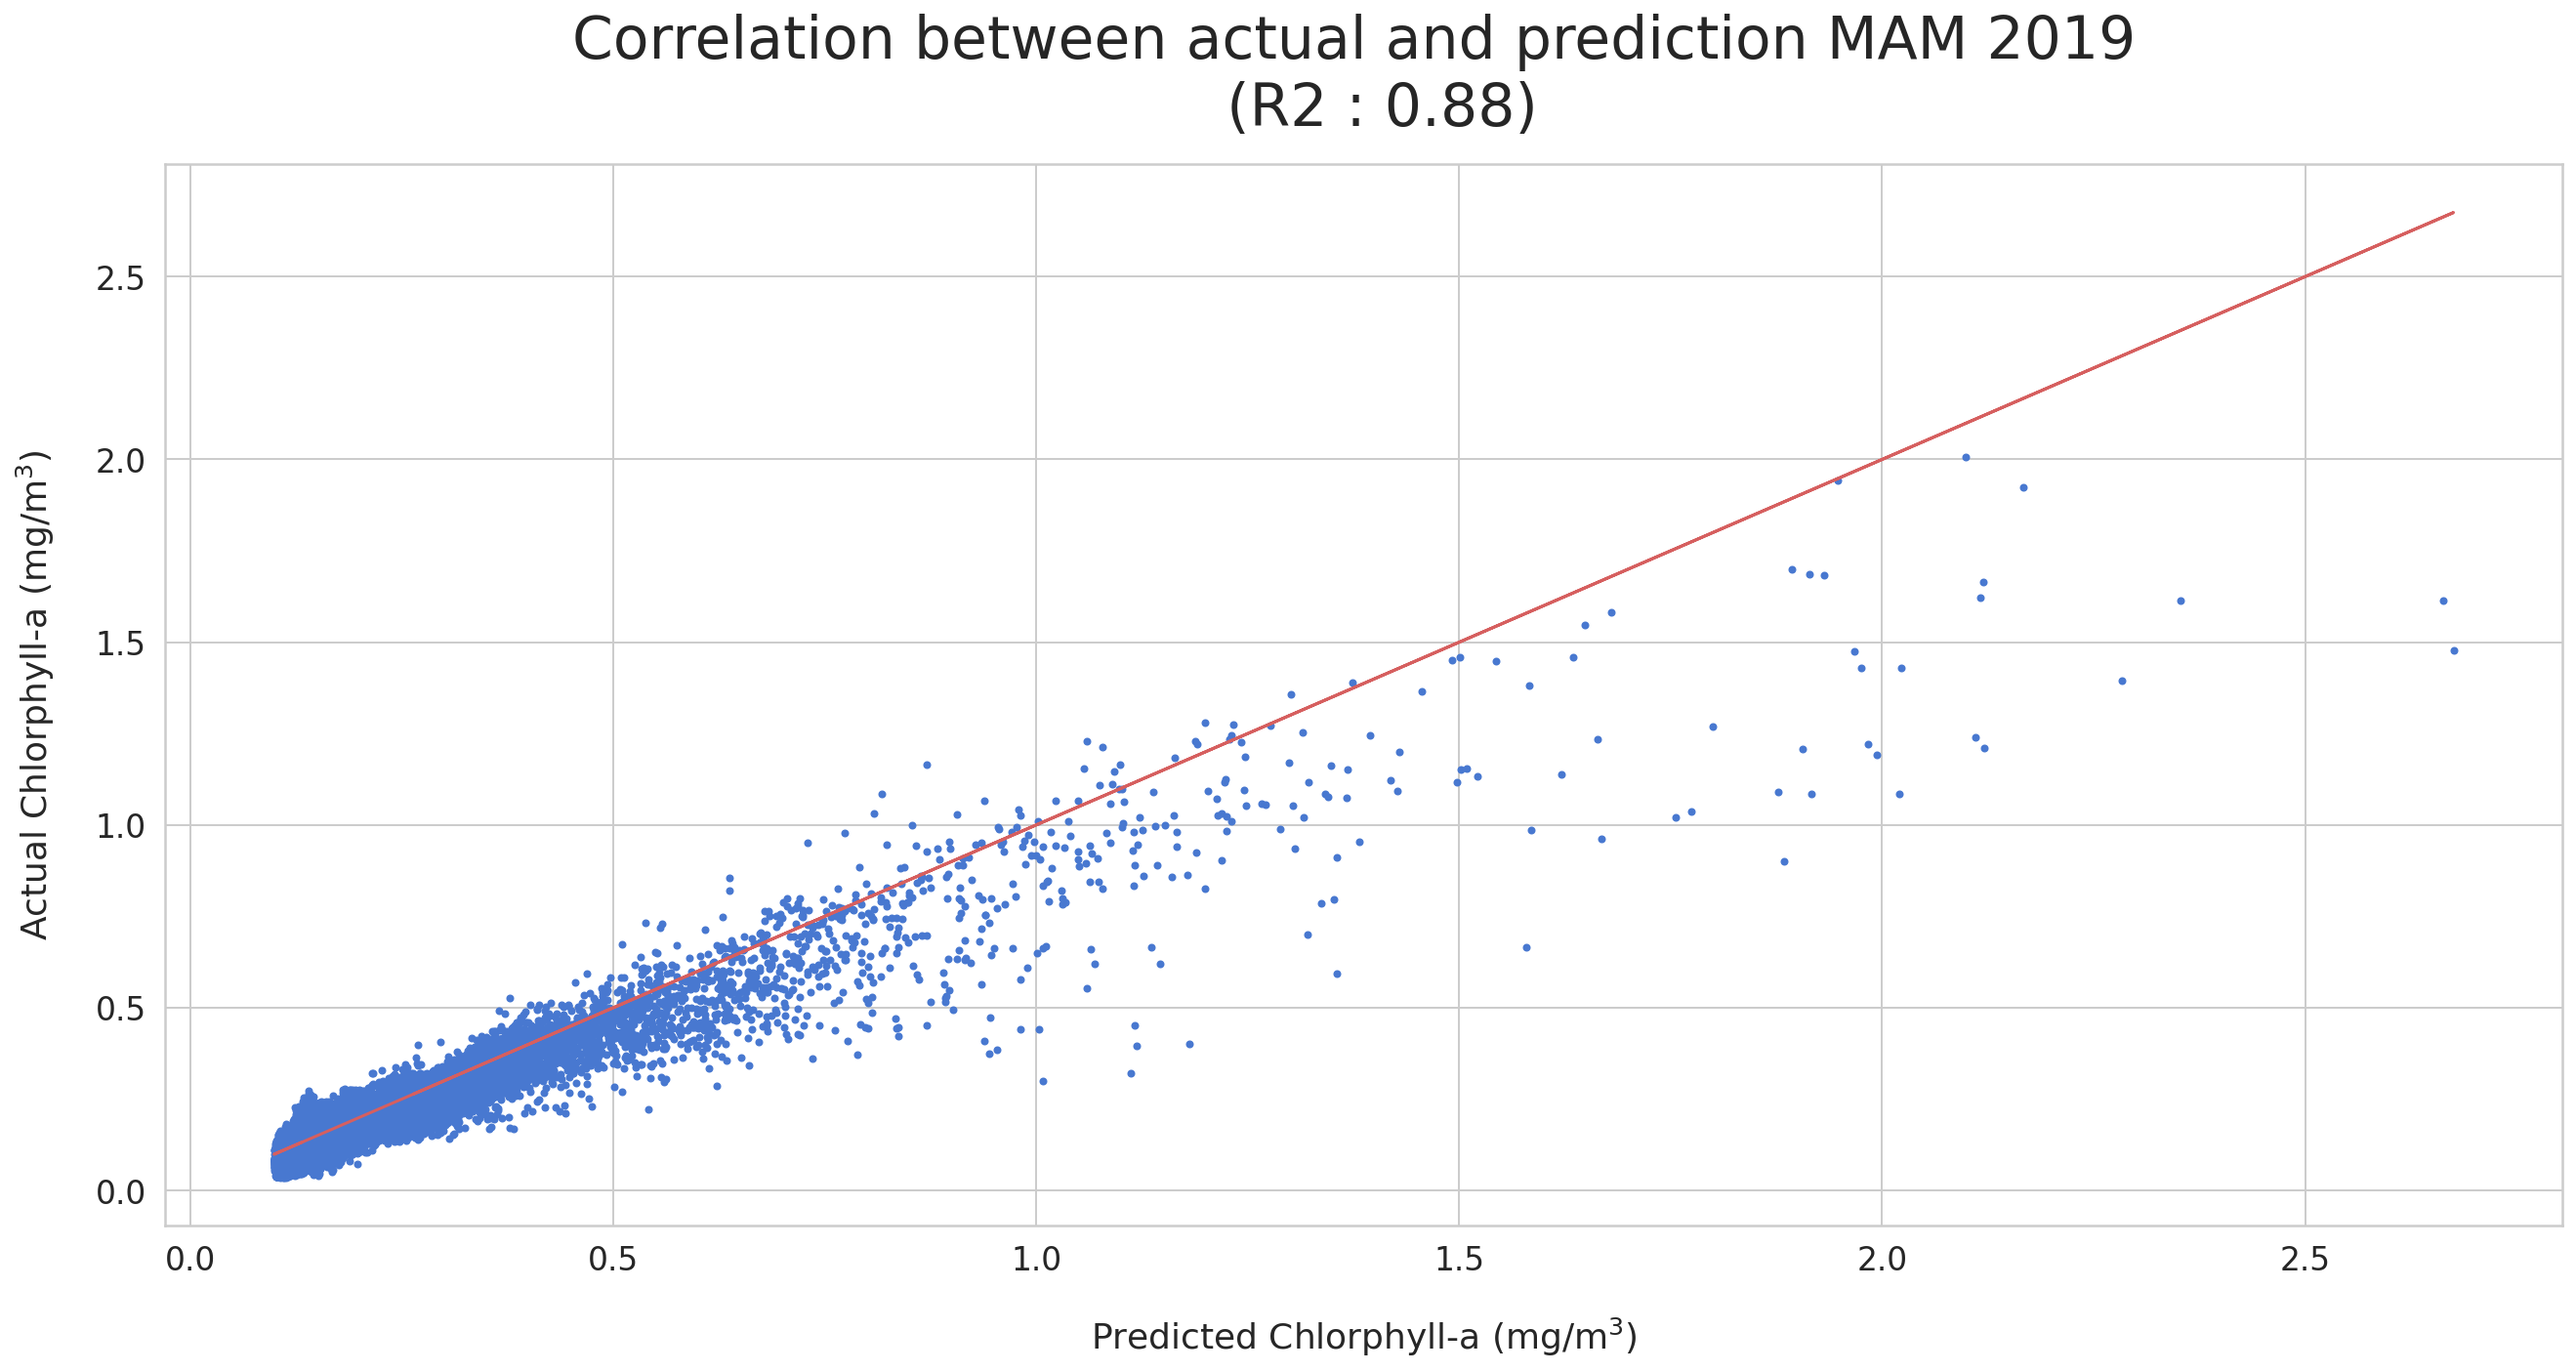

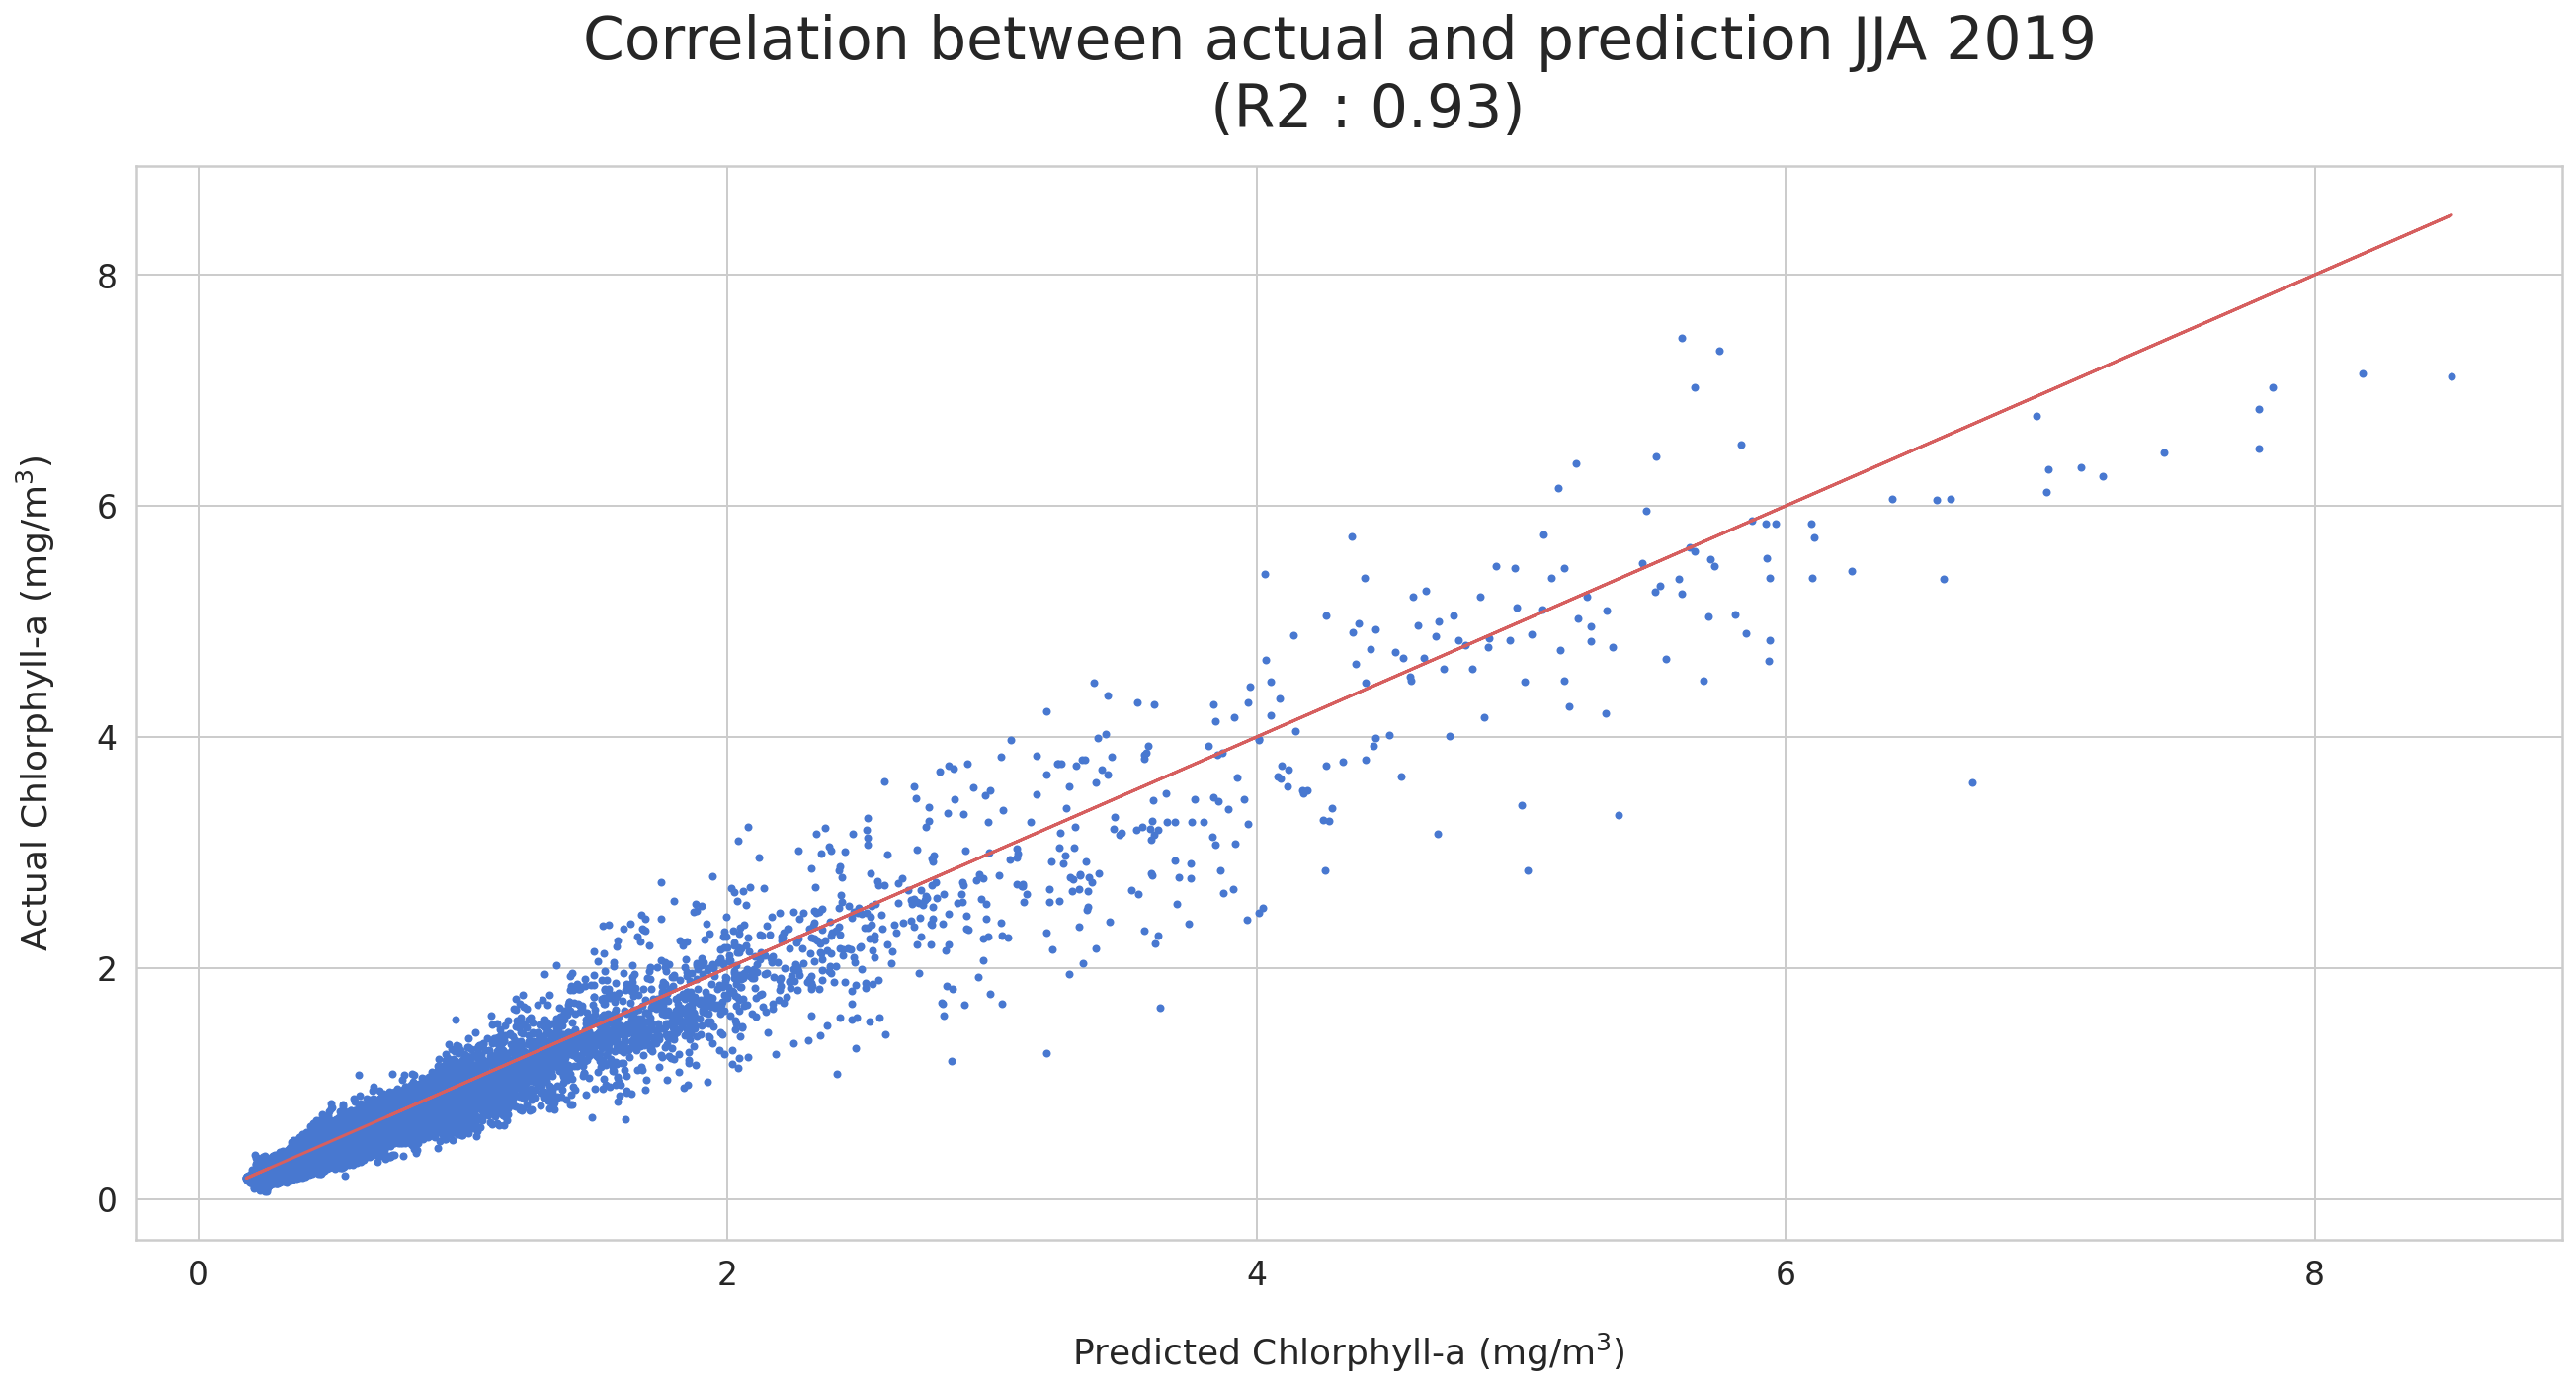

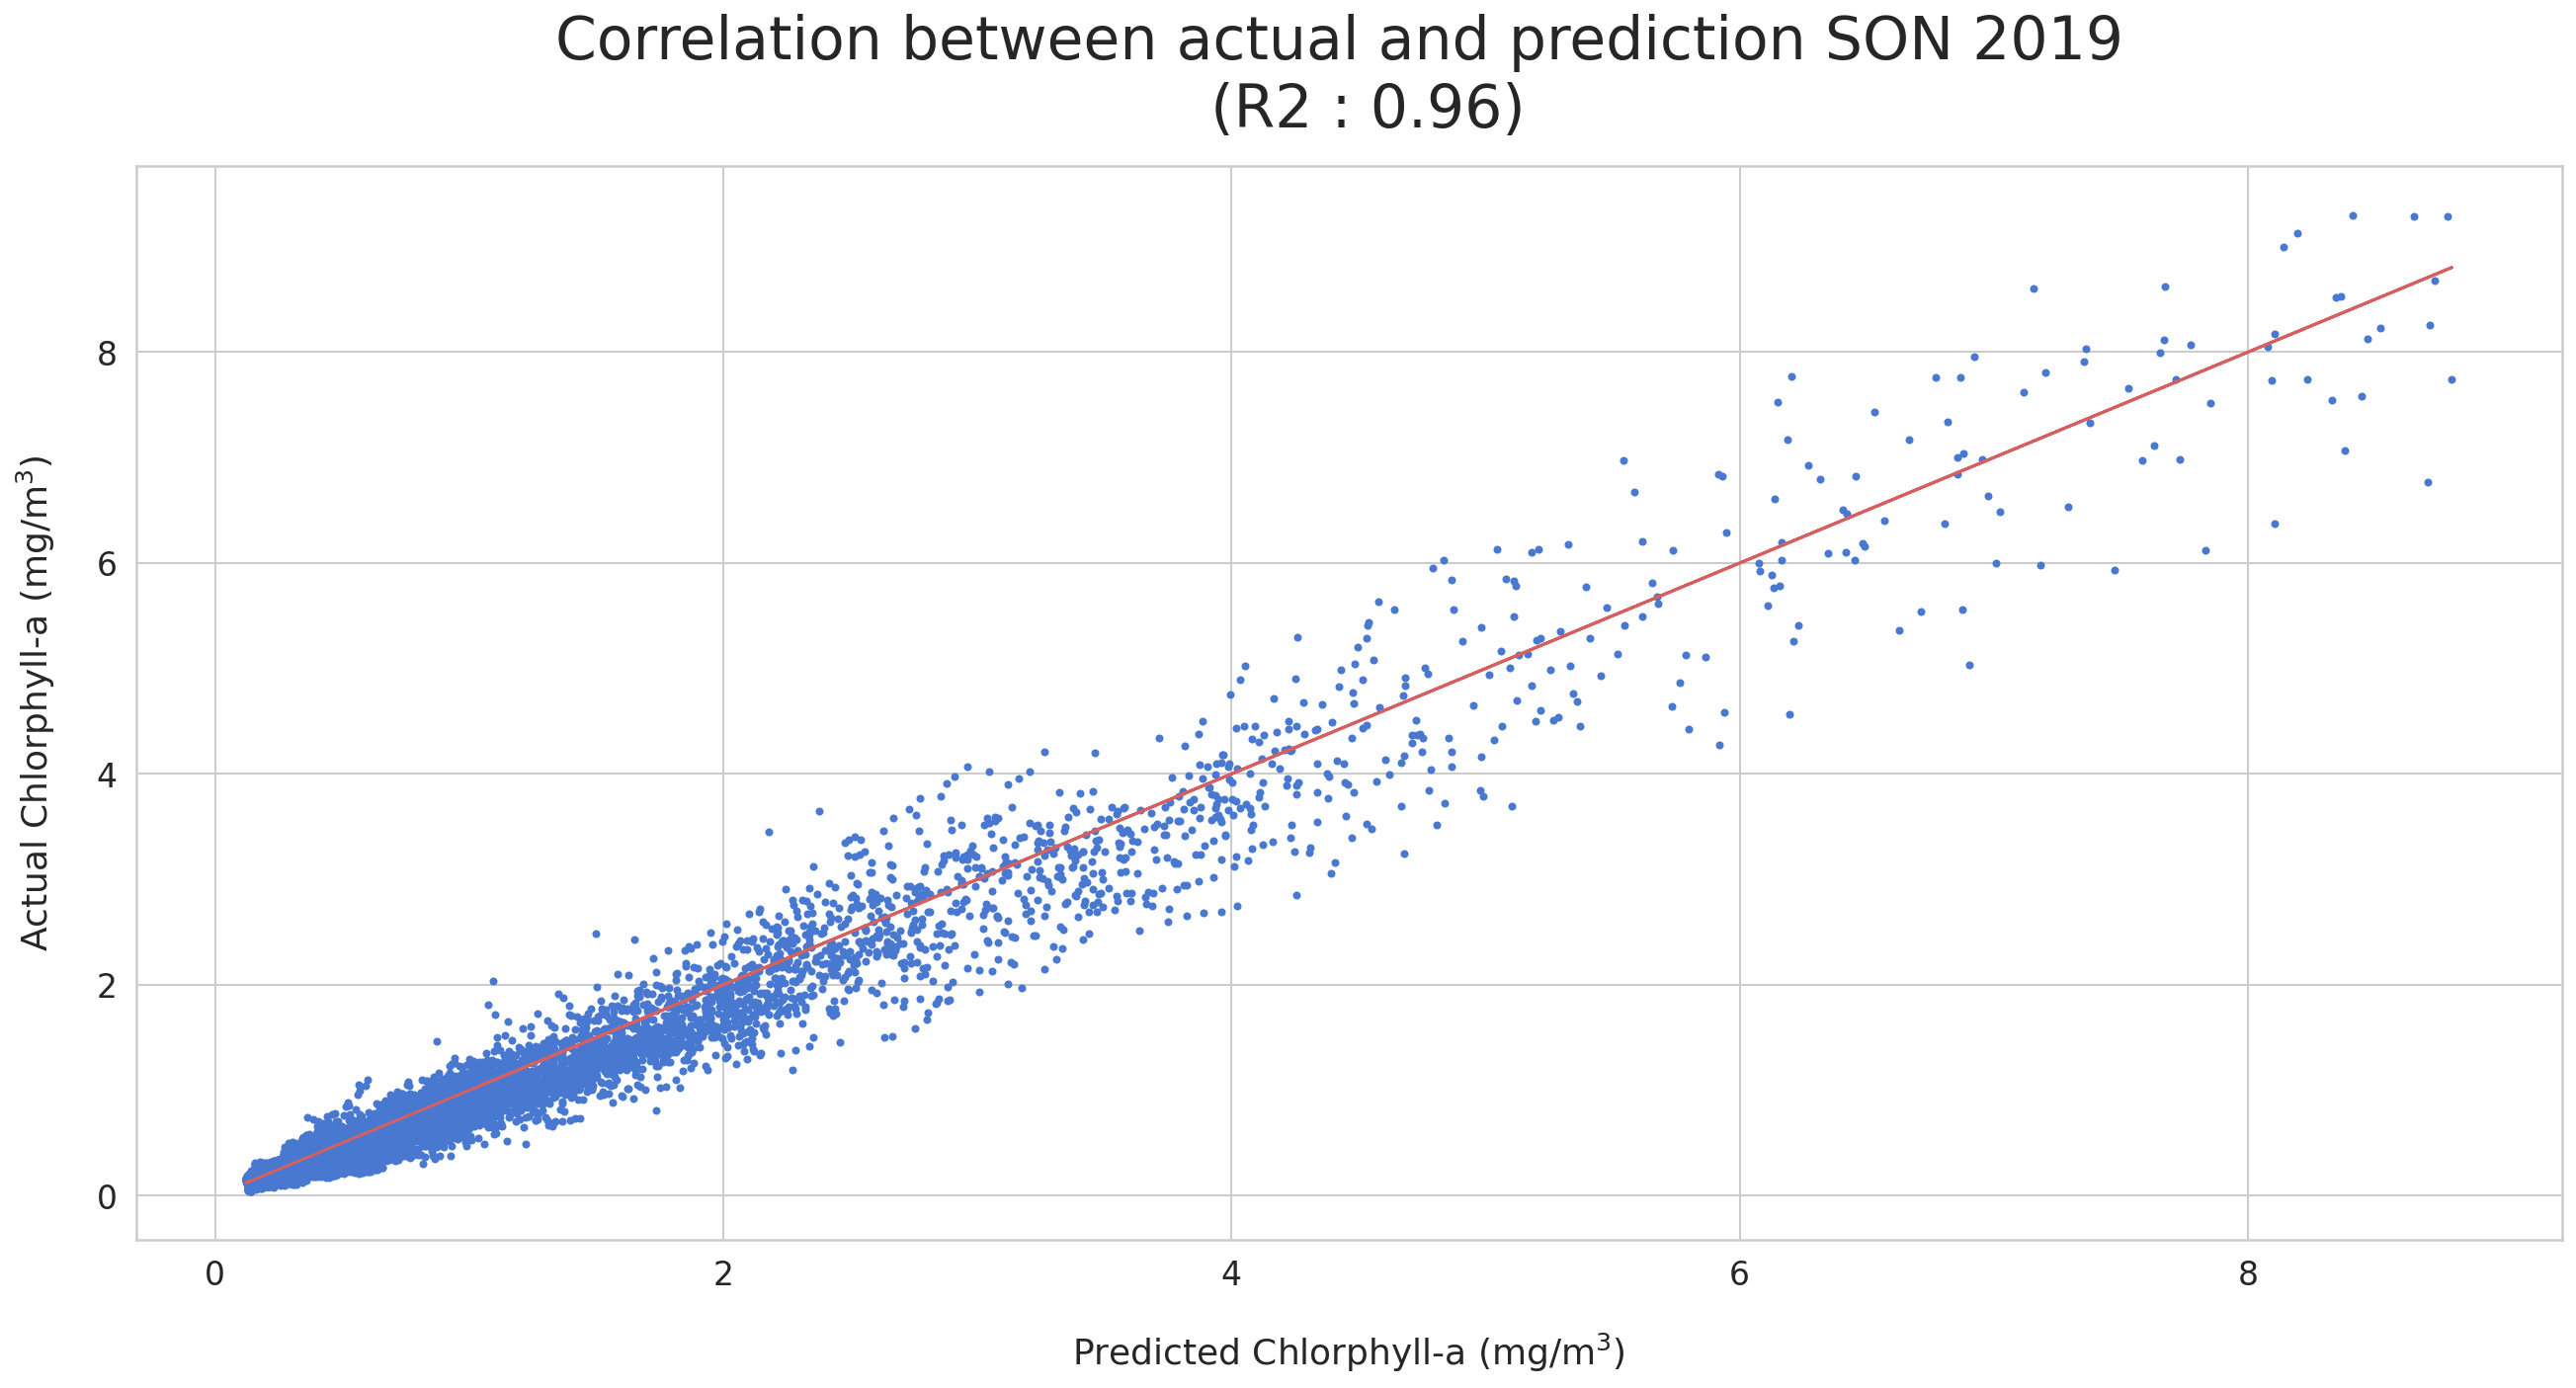

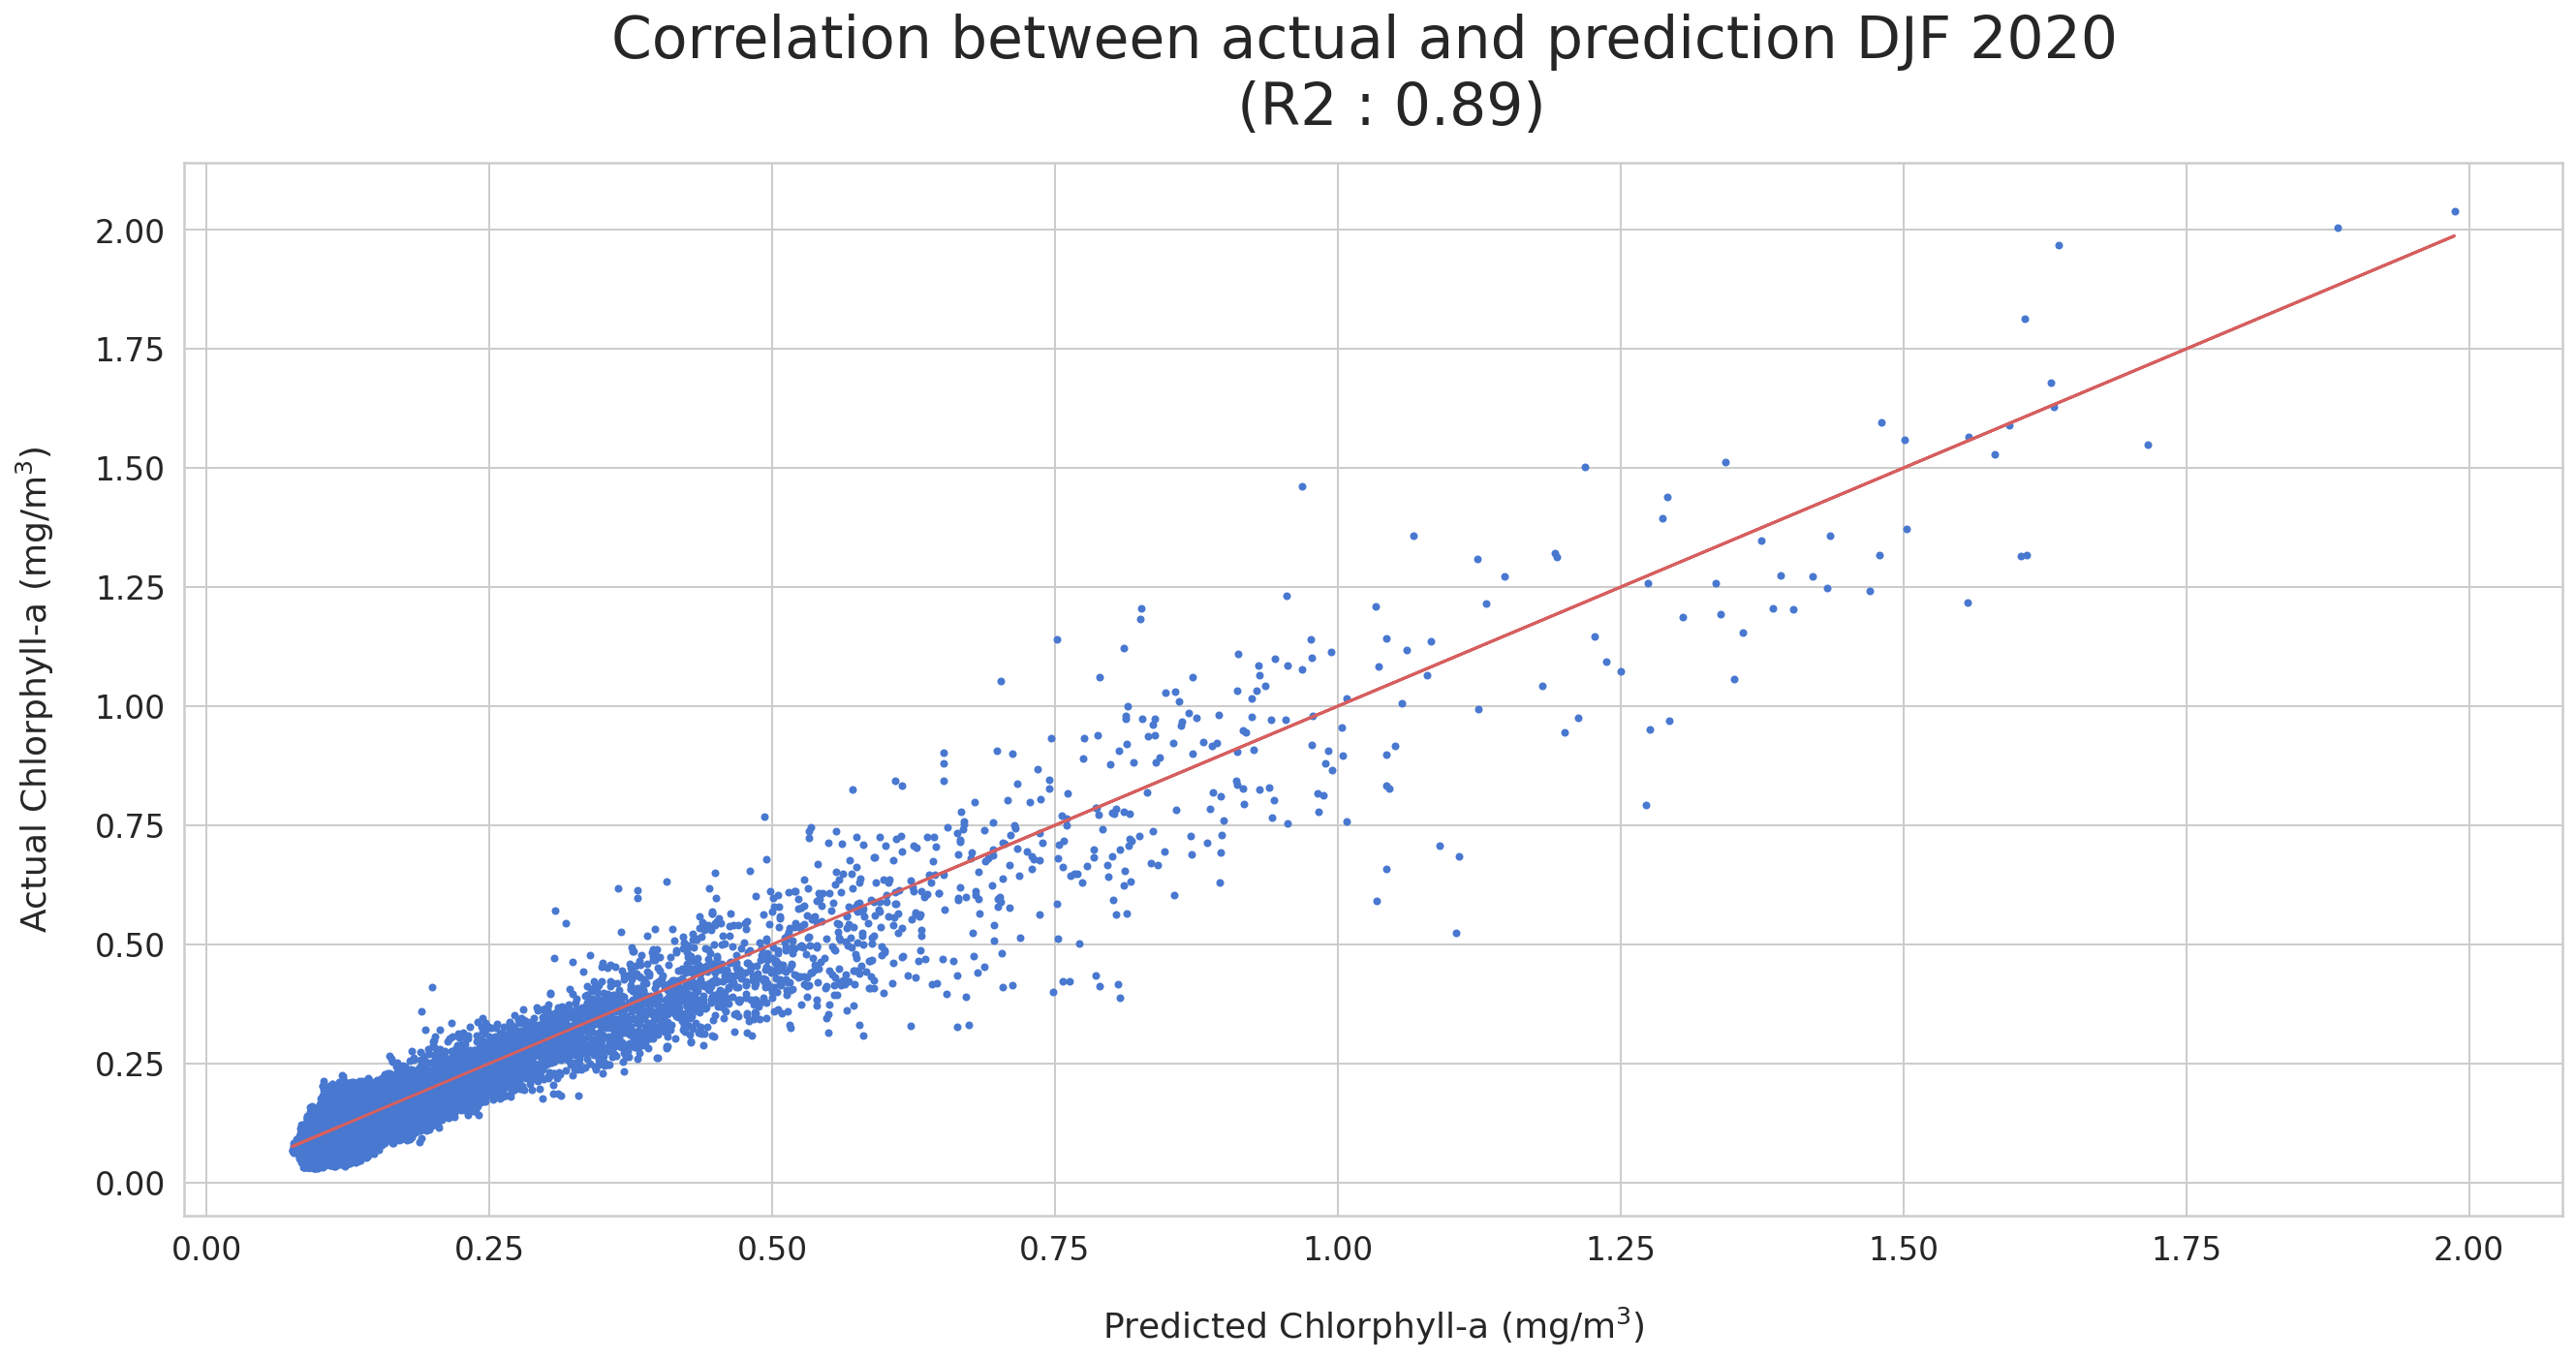

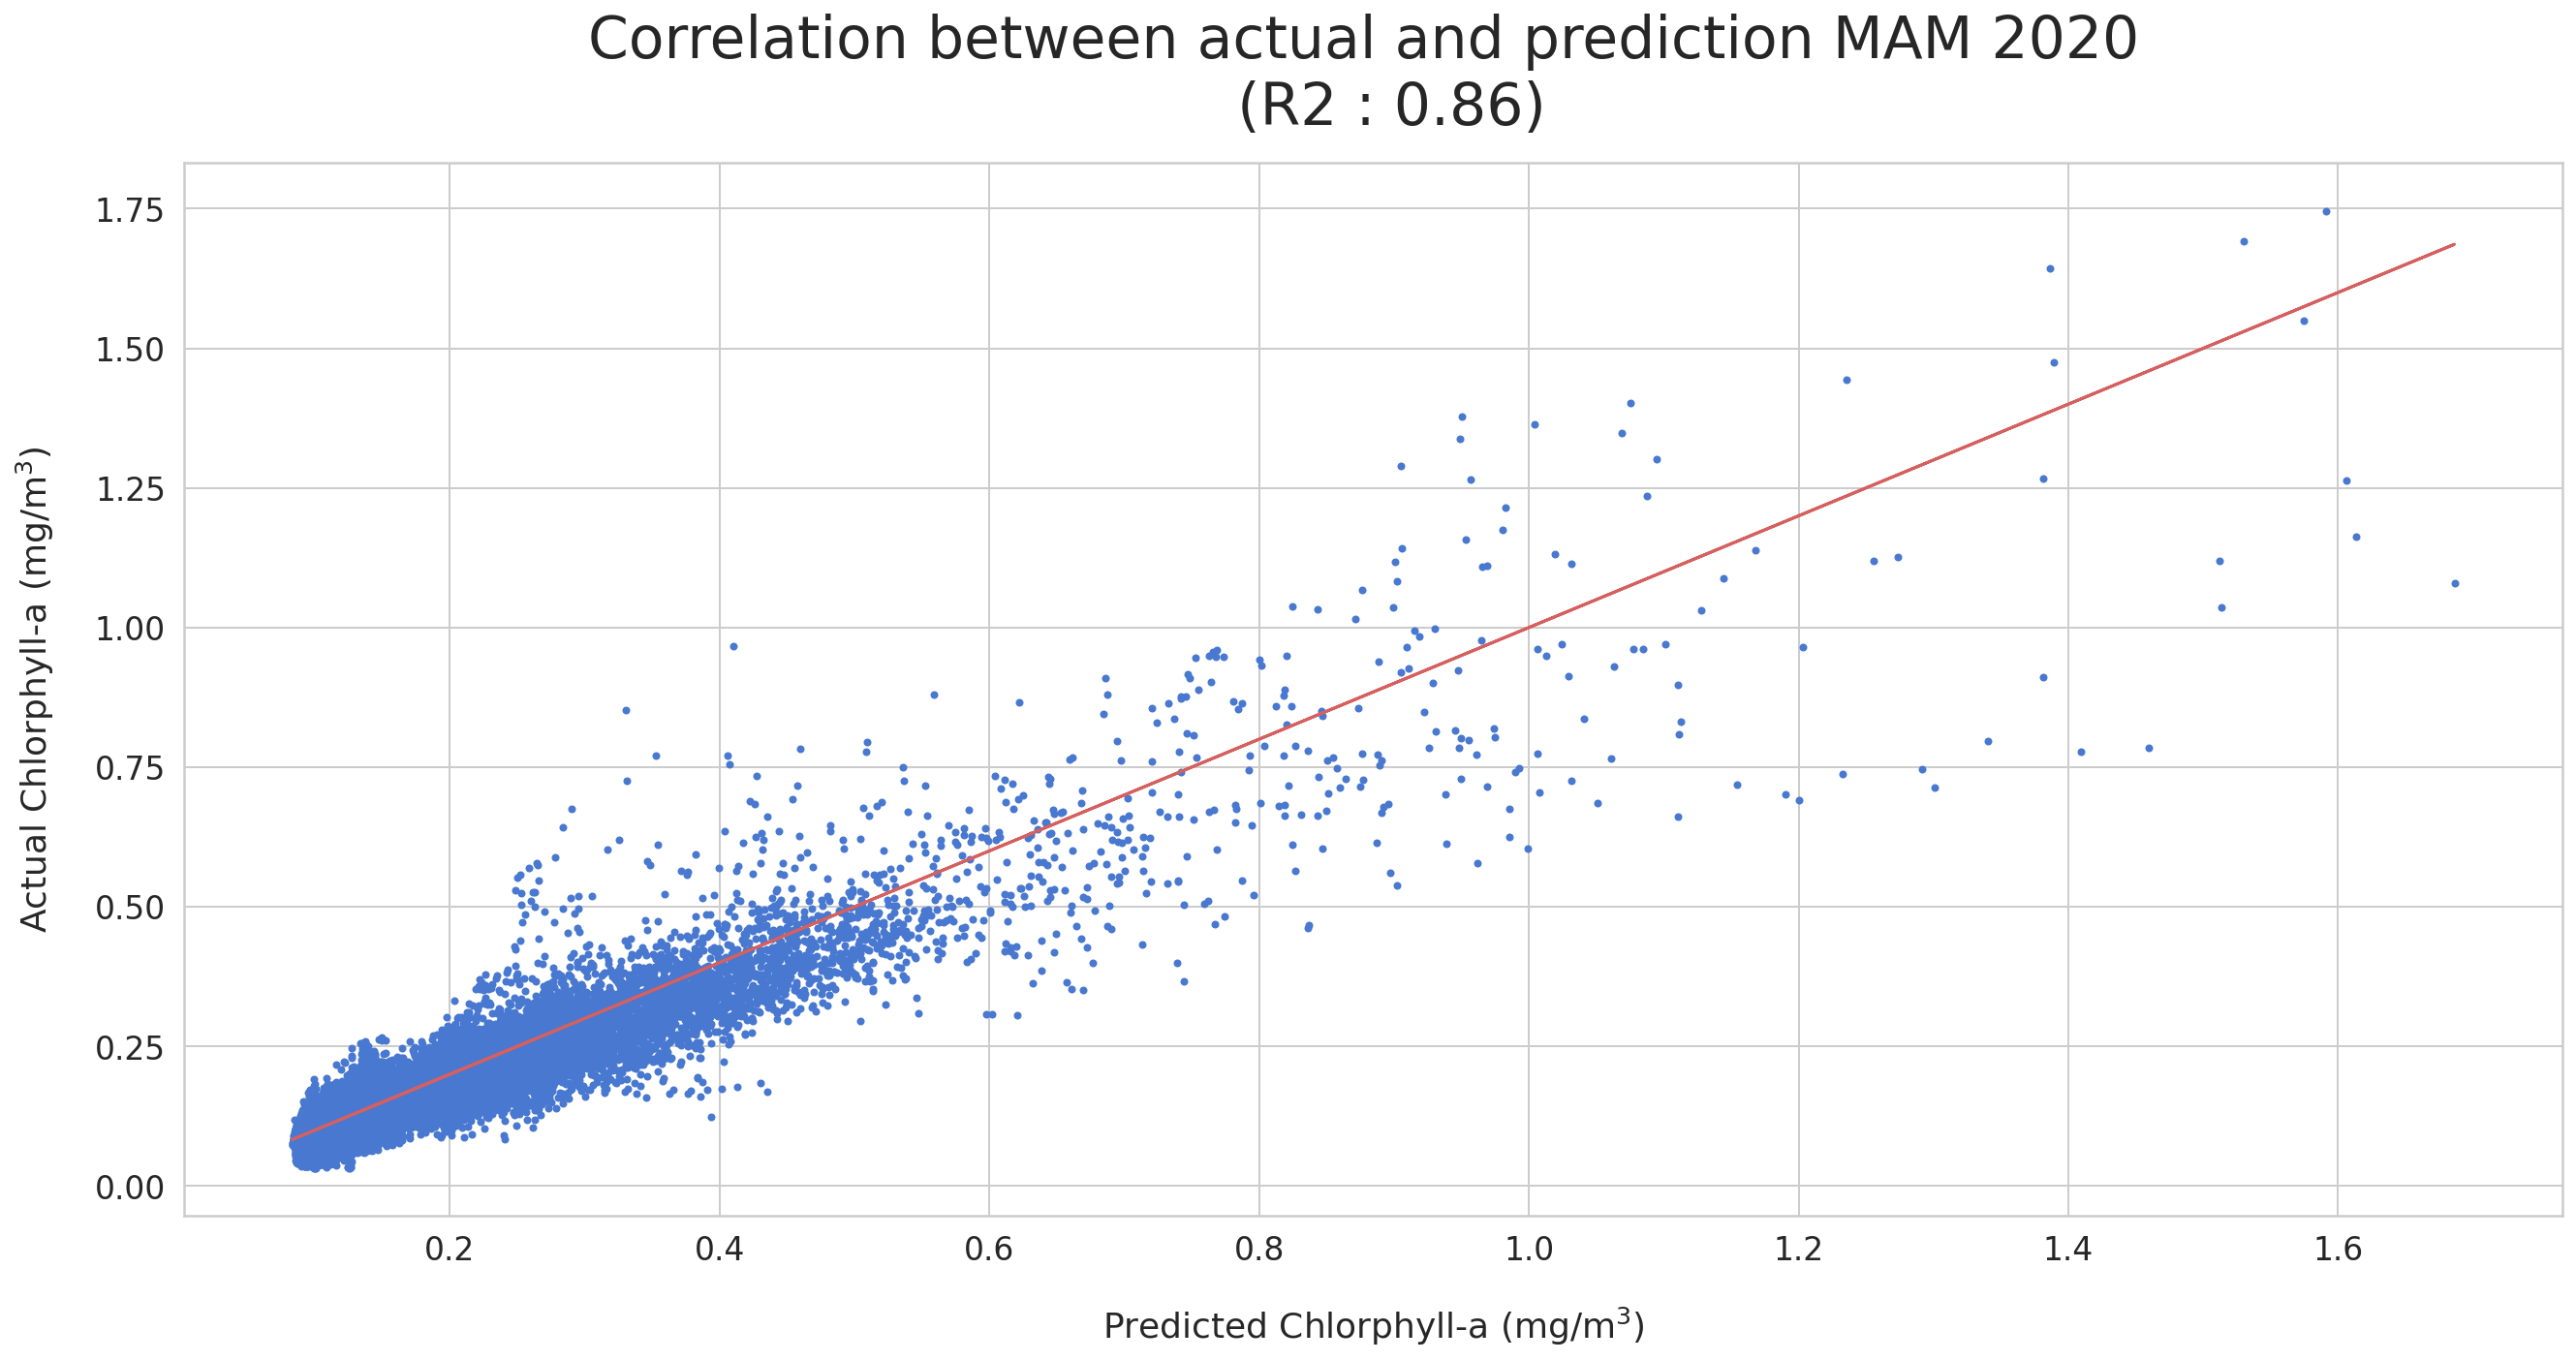

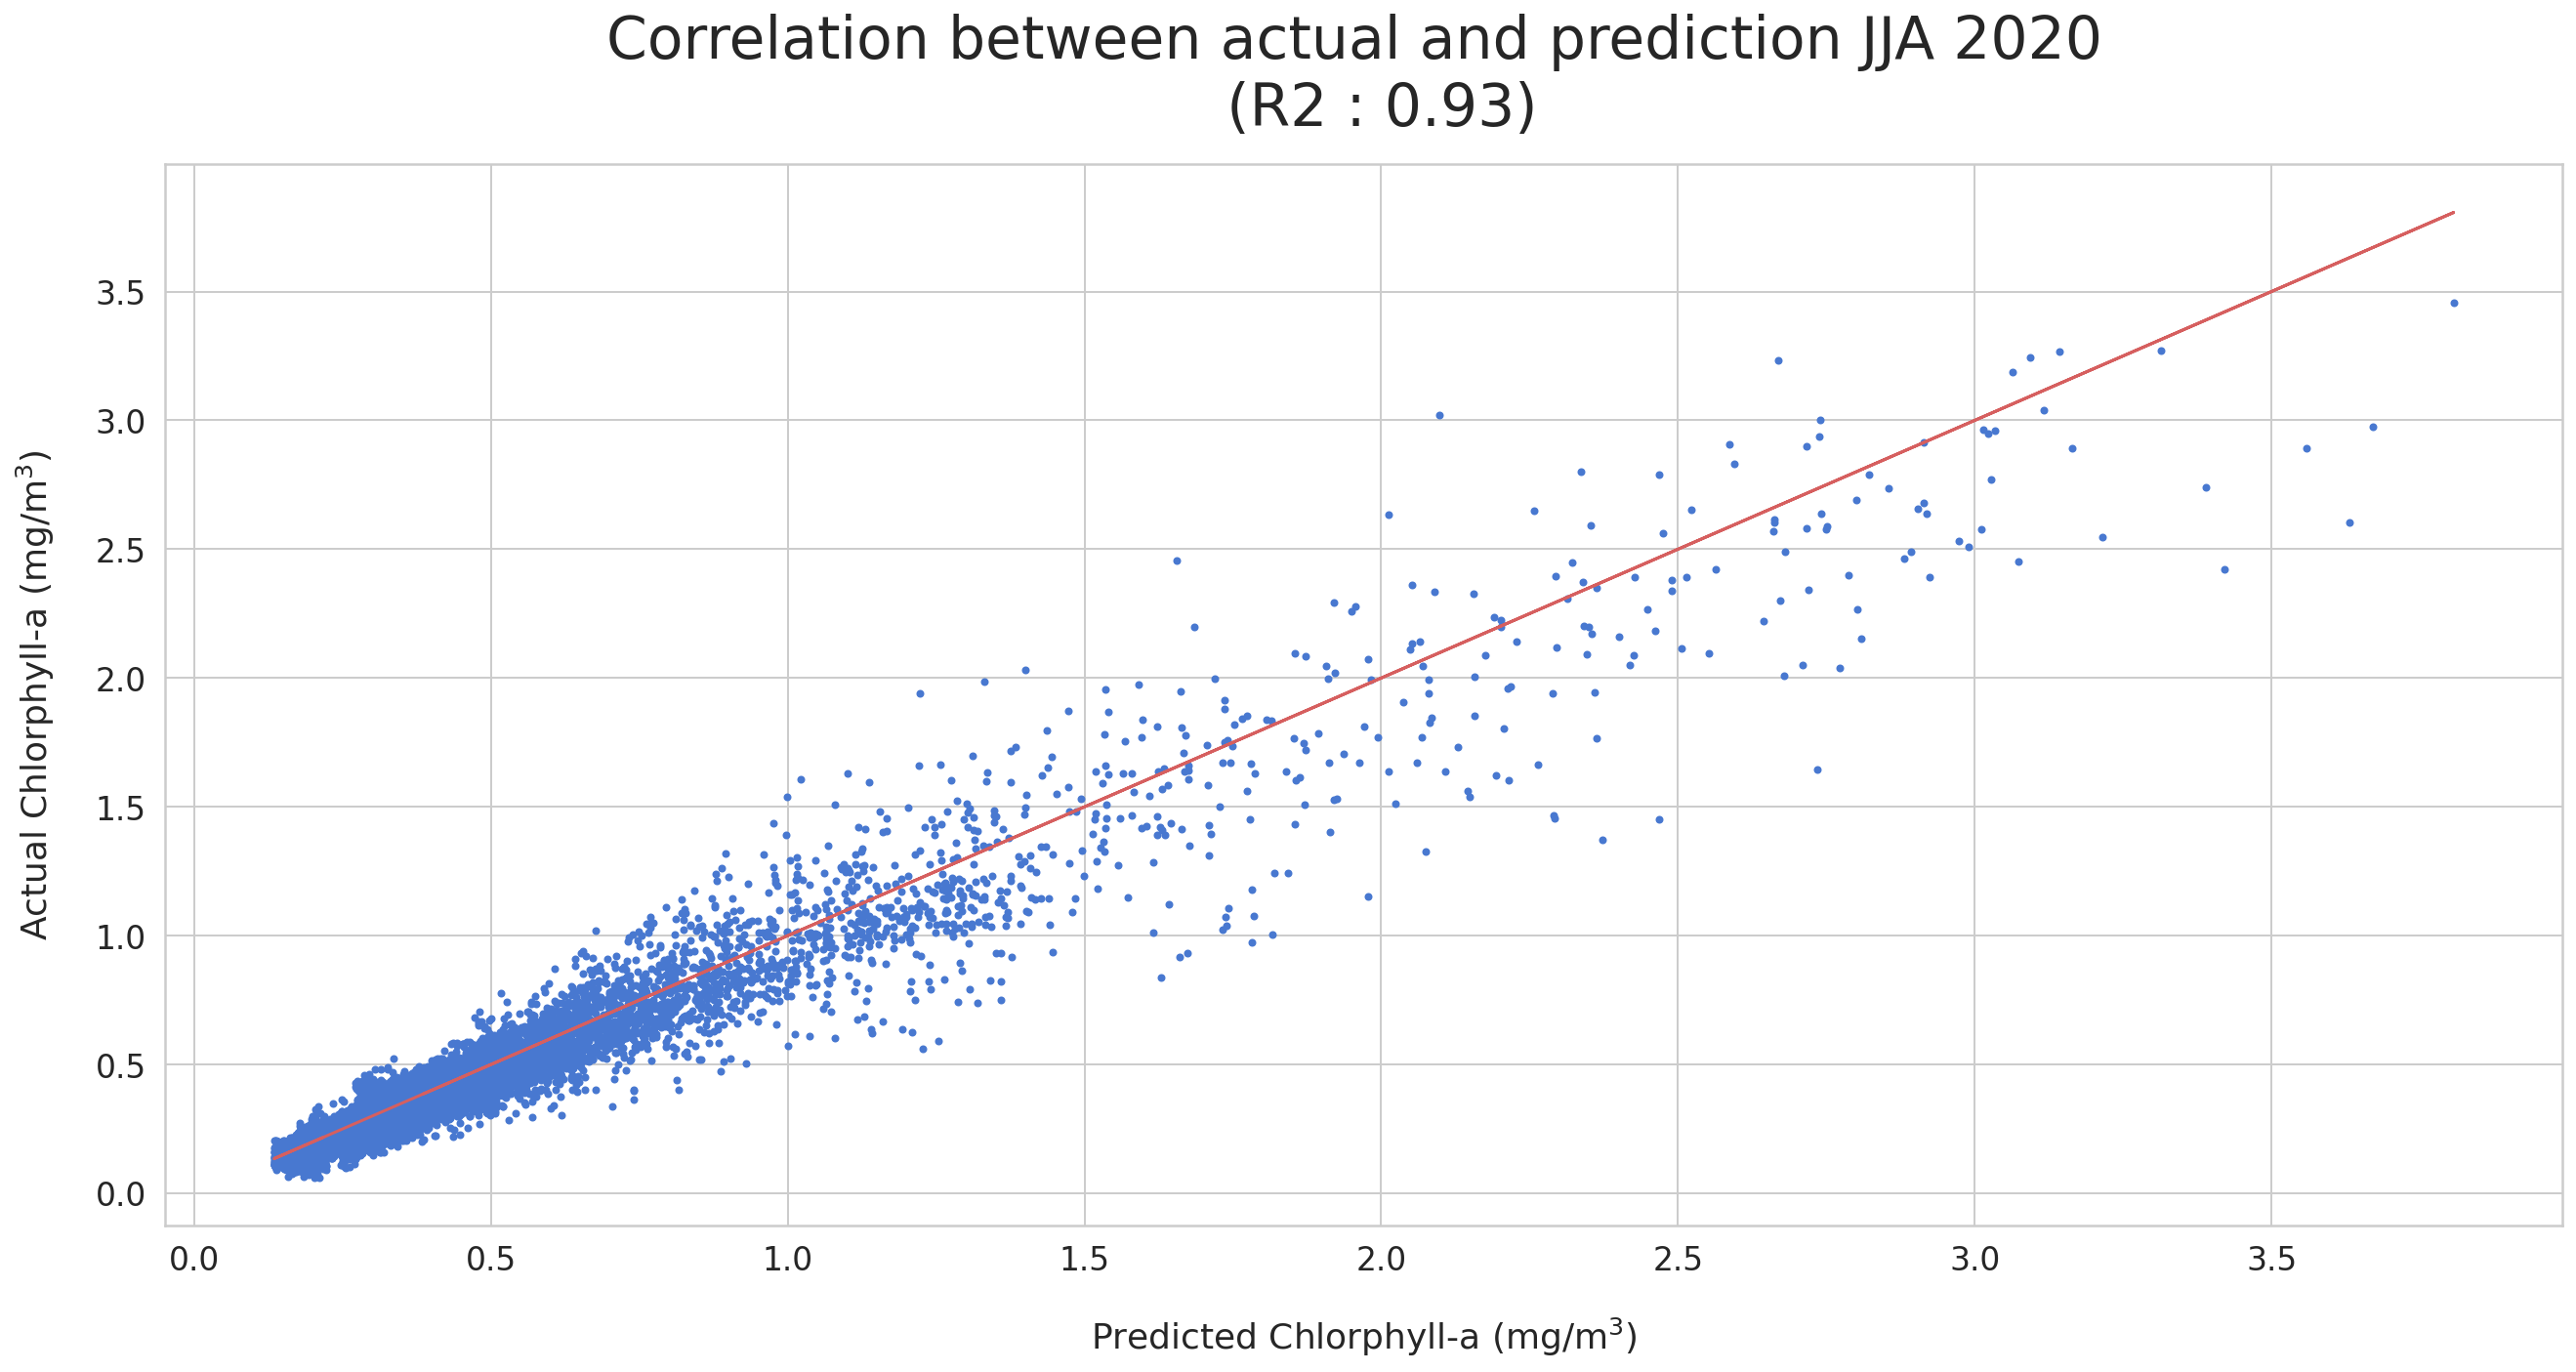

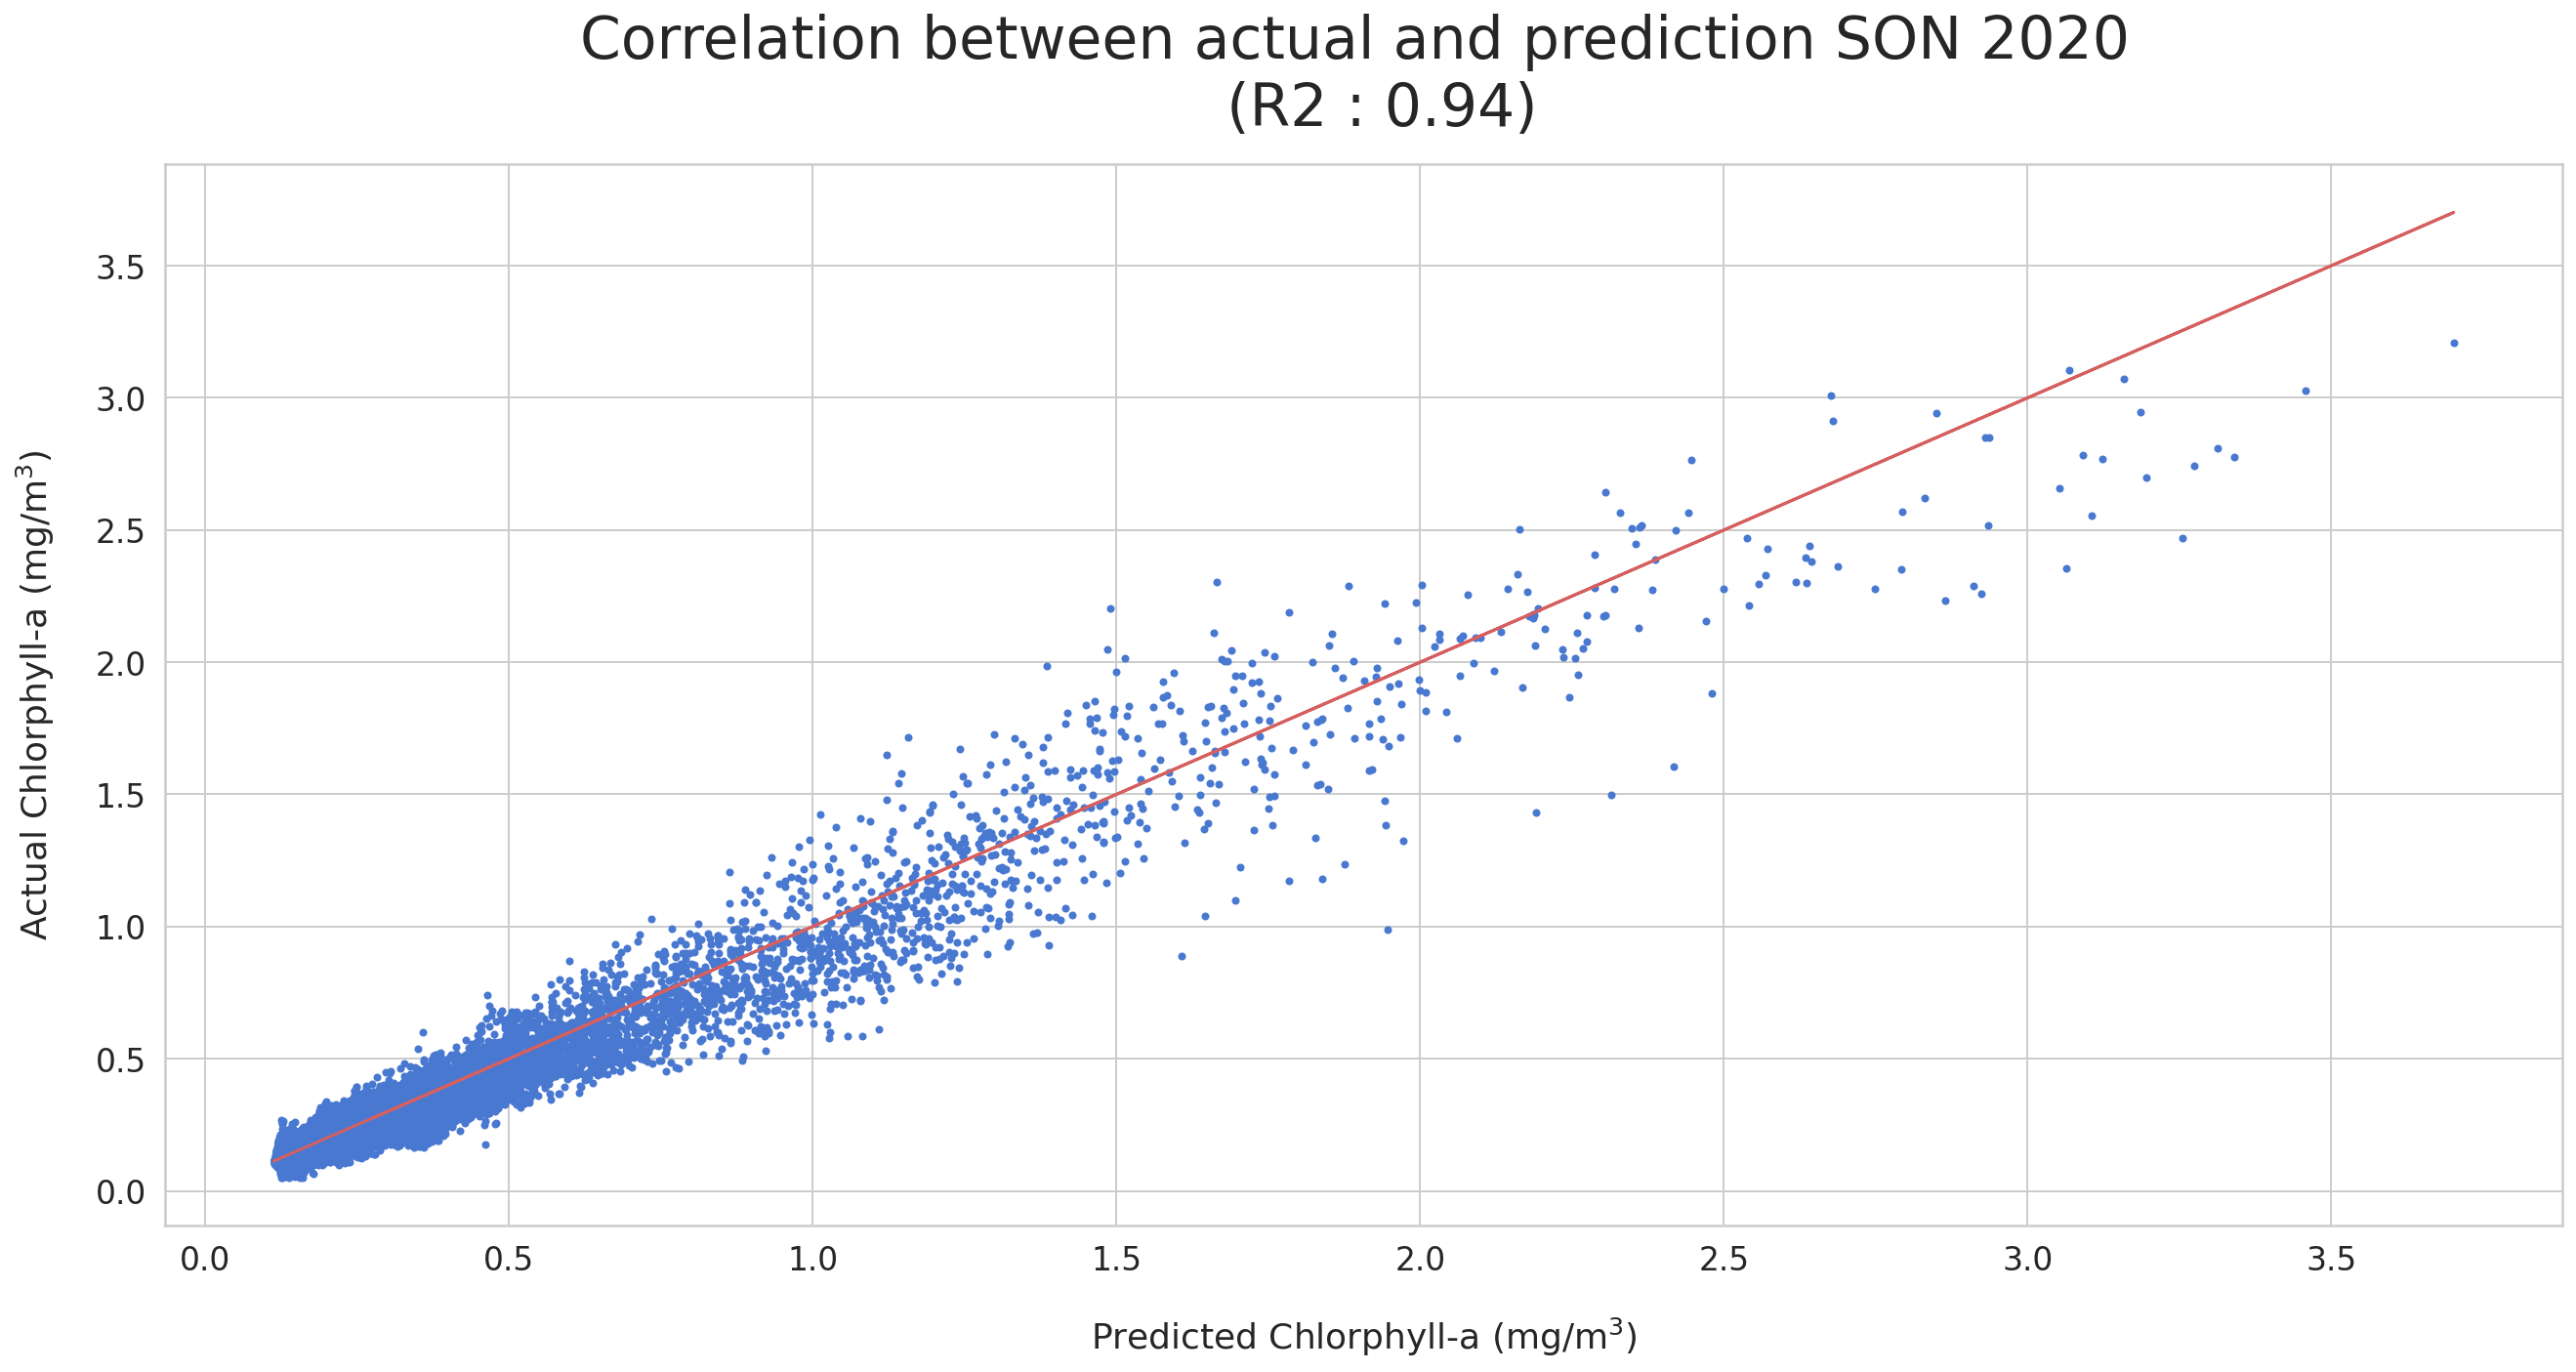

<Figure size 1584x720 with 0 Axes>

In [ ]:
for i in season:
  plot_korelasi(i)

##Coastal Area

In [35]:
coastal = pd.read_csv('./Coordinates/Data Coordinates in Coastal area.csv', index_col='Titik')
coastal

X    Y   Latitude  Longitude
Titik                               
1       0    0  -6.687503  104.97917
2       0    1  -6.687503  105.02084
3       0    2  -6.687503  105.06251
4       0    3  -6.687503  105.10417
5       0    4  -6.687503  105.14584
...    ..  ...        ...        ...
45822  90  371 -10.437503  120.43751
45823  90  372 -10.437503  120.47918
45824  90  373 -10.437503  120.52084
45825  90  374 -10.437503  120.56251
45826  90  375 -10.437503  120.60418

[2860 rows x 4 columns]

In [36]:
coastal_prediction, coastal_actual =  coastal.copy(), coastal.copy()

for i in season:
  coastal_prediction.loc[coastal.index, i] = season_pred.loc[coastal.index, i]
  coastal_actual.loc[coastal.index, i] = season_actual.loc[coastal.index, i]

In [37]:
coastal_prediction

X    Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  SON 2019  \
Titik                                                                          
1       0    0  -6.687503  104.97917  0.216468  0.260755  0.616715  0.908451   
2       0    1  -6.687503  105.02084  0.215912  0.259948  0.678233  1.032752   
3       0    2  -6.687503  105.06251  0.217817  0.260297  0.758941  1.135191   
4       0    3  -6.687503  105.10417  0.209937  0.248979  0.768741  1.154378   
5       0    4  -6.687503  105.14584  0.194044  0.231440  0.662942  0.932207   
...    ..  ...        ...        ...       ...       ...       ...       ...   
45822  90  371 -10.437503  120.43751  0.086826  0.283422  0.605503  0.373798   
45823  90  372 -10.437503  120.47918  0.065568  0.227341  0.523881  0.323514   
45824  90  373 -10.437503  120.52084  0.075069  0.214274  0.484202  0.305771   
45825  90  374 -10.437503  120.56251  0.077903  0.201209  0.458614  0.288888   
45826  90  375 -10.437503  120.60418  0.082879  0.192902  0.453497  0.281763   

       DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                          
1      0.465107  0.246442  0.328360  0.279753  
2      0.469648  0.247681  0.330740  0.280320  
3      0.475135  0.250002  0.333890  0.280494  
4      0.465262  0.239788  0.323124  0.267912  
5      0.432176  0.223717  0.302487  0.248723  
...         ...       ...       ...       ...  
45822  0.096058  0.216727  0.434515  0.287192  
45823  0.074839  0.175785  0.373729  0.247313  
45824  0.085679  0.173877  0.353468  0.237749  
45825  0.089700  0.169179  0.333544  0.225766  
45826  0.095794  0.167379  0.330730  0.222620  

[2860 rows x 12 columns]

In [38]:
coastal_actual

X    Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  SON 2019  \
Titik                                                                          
1       0    0  -6.687503  104.97917  0.235333  0.264256  0.715411  1.049654   
2       0    1  -6.687503  105.02084  0.234035  0.265219  0.745111  1.226310   
3       0    2  -6.687503  105.06251  0.235093  0.266959  0.803758  1.373188   
4       0    3  -6.687503  105.10417  0.234888  0.268919  0.827765  1.407288   
5       0    4  -6.687503  105.14584  0.238663  0.276619  0.787584  1.285134   
...    ..  ...        ...        ...       ...       ...       ...       ...   
45822  90  371 -10.437503  120.43751  0.118850  0.500990  0.936596  0.475359   
45823  90  372 -10.437503  120.47918  0.118084  0.419817  0.779197  0.431510   
45824  90  373 -10.437503  120.52084  0.116511  0.342140  0.691846  0.397924   
45825  90  374 -10.437503  120.56251  0.117282  0.280724  0.661104  0.374468   
45826  90  375 -10.437503  120.60418  0.117552  0.241472  0.639531  0.361737   

       DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                          
1      0.629667  0.263558  0.385438  0.276368  
2      0.650233  0.258327  0.390281  0.284324  
3      0.615174  0.262490  0.388856  0.292464  
4      0.586709  0.269550  0.383783  0.294074  
5      0.587354  0.278683  0.383089  0.294436  
...         ...       ...       ...       ...  
45822  0.124339  0.240216  0.454828  0.326259  
45823  0.124668  0.232060  0.440543  0.281985  
45824  0.123811  0.222907  0.421018  0.245022  
45825  0.123197  0.211646  0.397916  0.233301  
45826  0.123704  0.199680  0.390676  0.226967  

[2860 rows x 12 columns]

In [39]:
coastal_prediction[season].describe().T.round(3)

count   mean    std    min    25%    50%    75%    max
DJF 2019  2860.0  0.230  0.167  0.055  0.137  0.182  0.257  1.454
MAM 2019  2860.0  0.407  0.248  0.083  0.236  0.332  0.493  2.006
JJA 2019  2860.0  1.397  1.110  0.110  0.657  1.085  1.739  7.455
SON 2019  2860.0  1.618  1.628  0.086  0.434  0.838  2.466  9.301
DJF 2020  2860.0  0.323  0.249  0.057  0.154  0.243  0.406  2.040
MAM 2020  2860.0  0.350  0.199  0.081  0.220  0.290  0.414  1.746
JJA 2020  2860.0  0.734  0.500  0.108  0.407  0.582  0.876  3.455
SON 2020  2860.0  0.678  0.538  0.076  0.303  0.444  0.915  3.209

In [40]:
coastal_actual[season].describe().T.round(3)

count   mean    std    min    25%    50%    75%    max
DJF 2019  2860.0  0.240  0.168  0.104  0.141  0.191  0.264  1.793
MAM 2019  2860.0  0.458  0.306  0.138  0.252  0.364  0.558  2.676
JJA 2019  2860.0  1.500  1.137  0.192  0.773  1.167  1.842  8.518
SON 2019  2860.0  1.717  1.644  0.164  0.477  0.982  2.603  8.803
DJF 2020  2860.0  0.330  0.250  0.103  0.150  0.241  0.420  1.987
MAM 2020  2860.0  0.362  0.207  0.146  0.228  0.288  0.426  1.686
JJA 2020  2860.0  0.764  0.529  0.190  0.425  0.596  0.897  3.807
SON 2020  2860.0  0.690  0.551  0.141  0.312  0.453  0.947  3.701

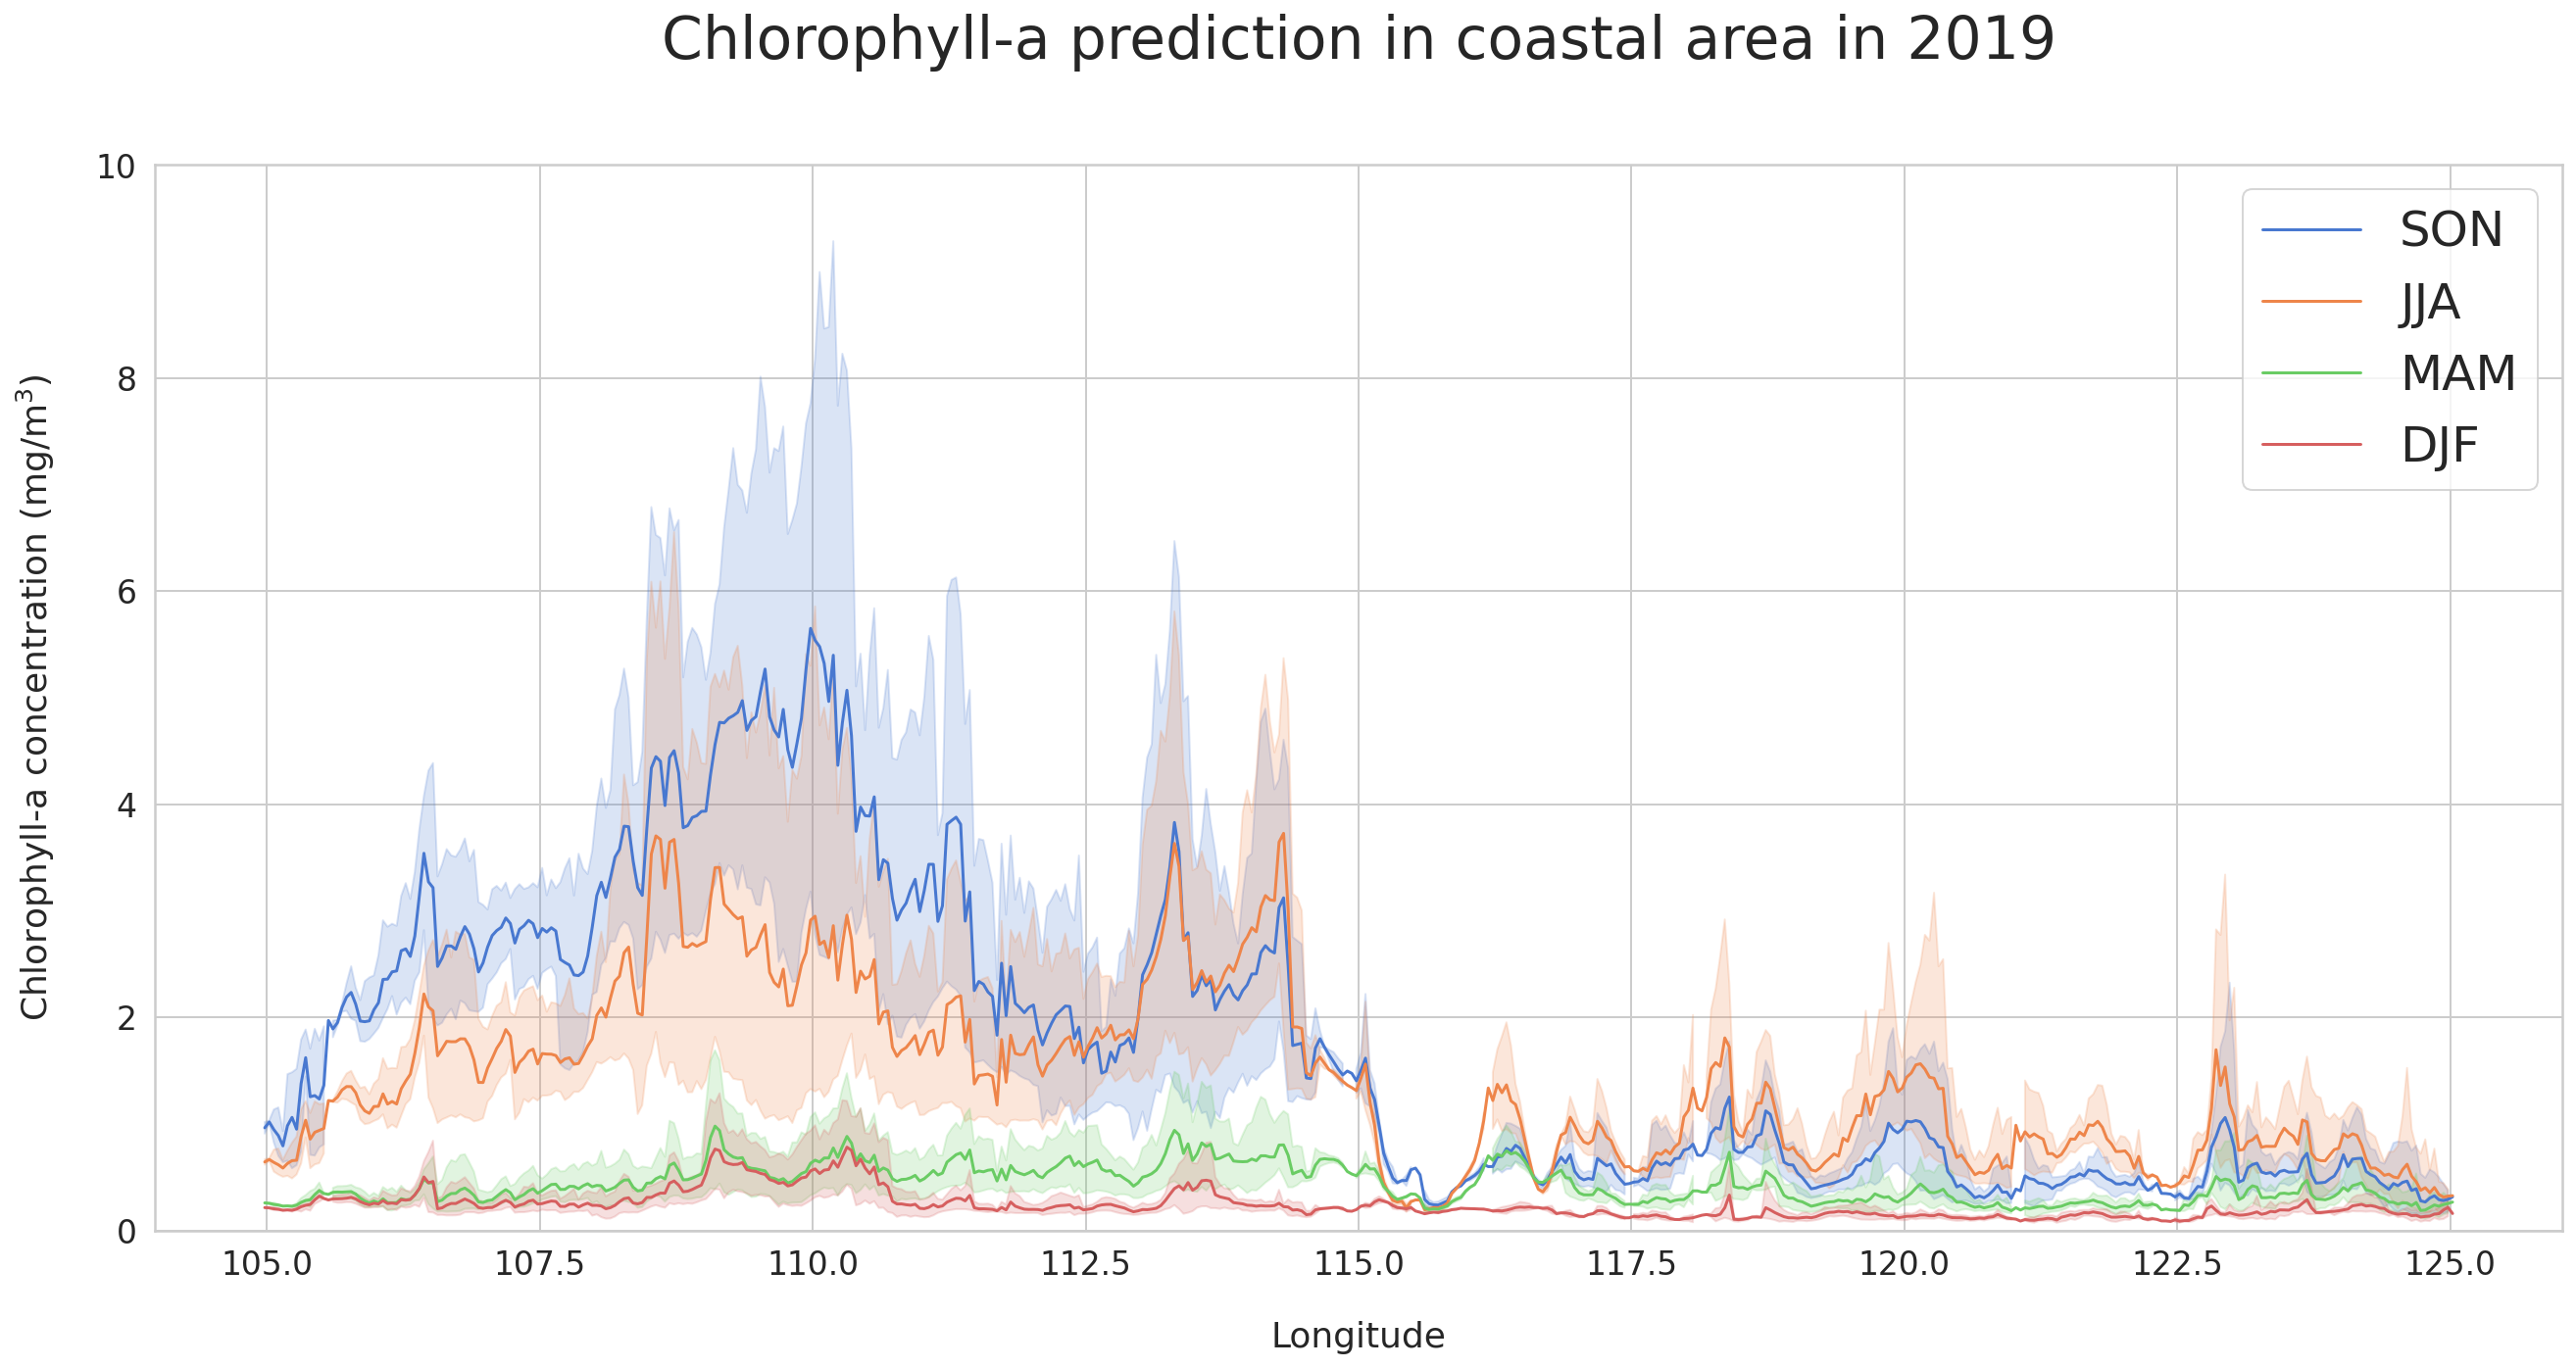

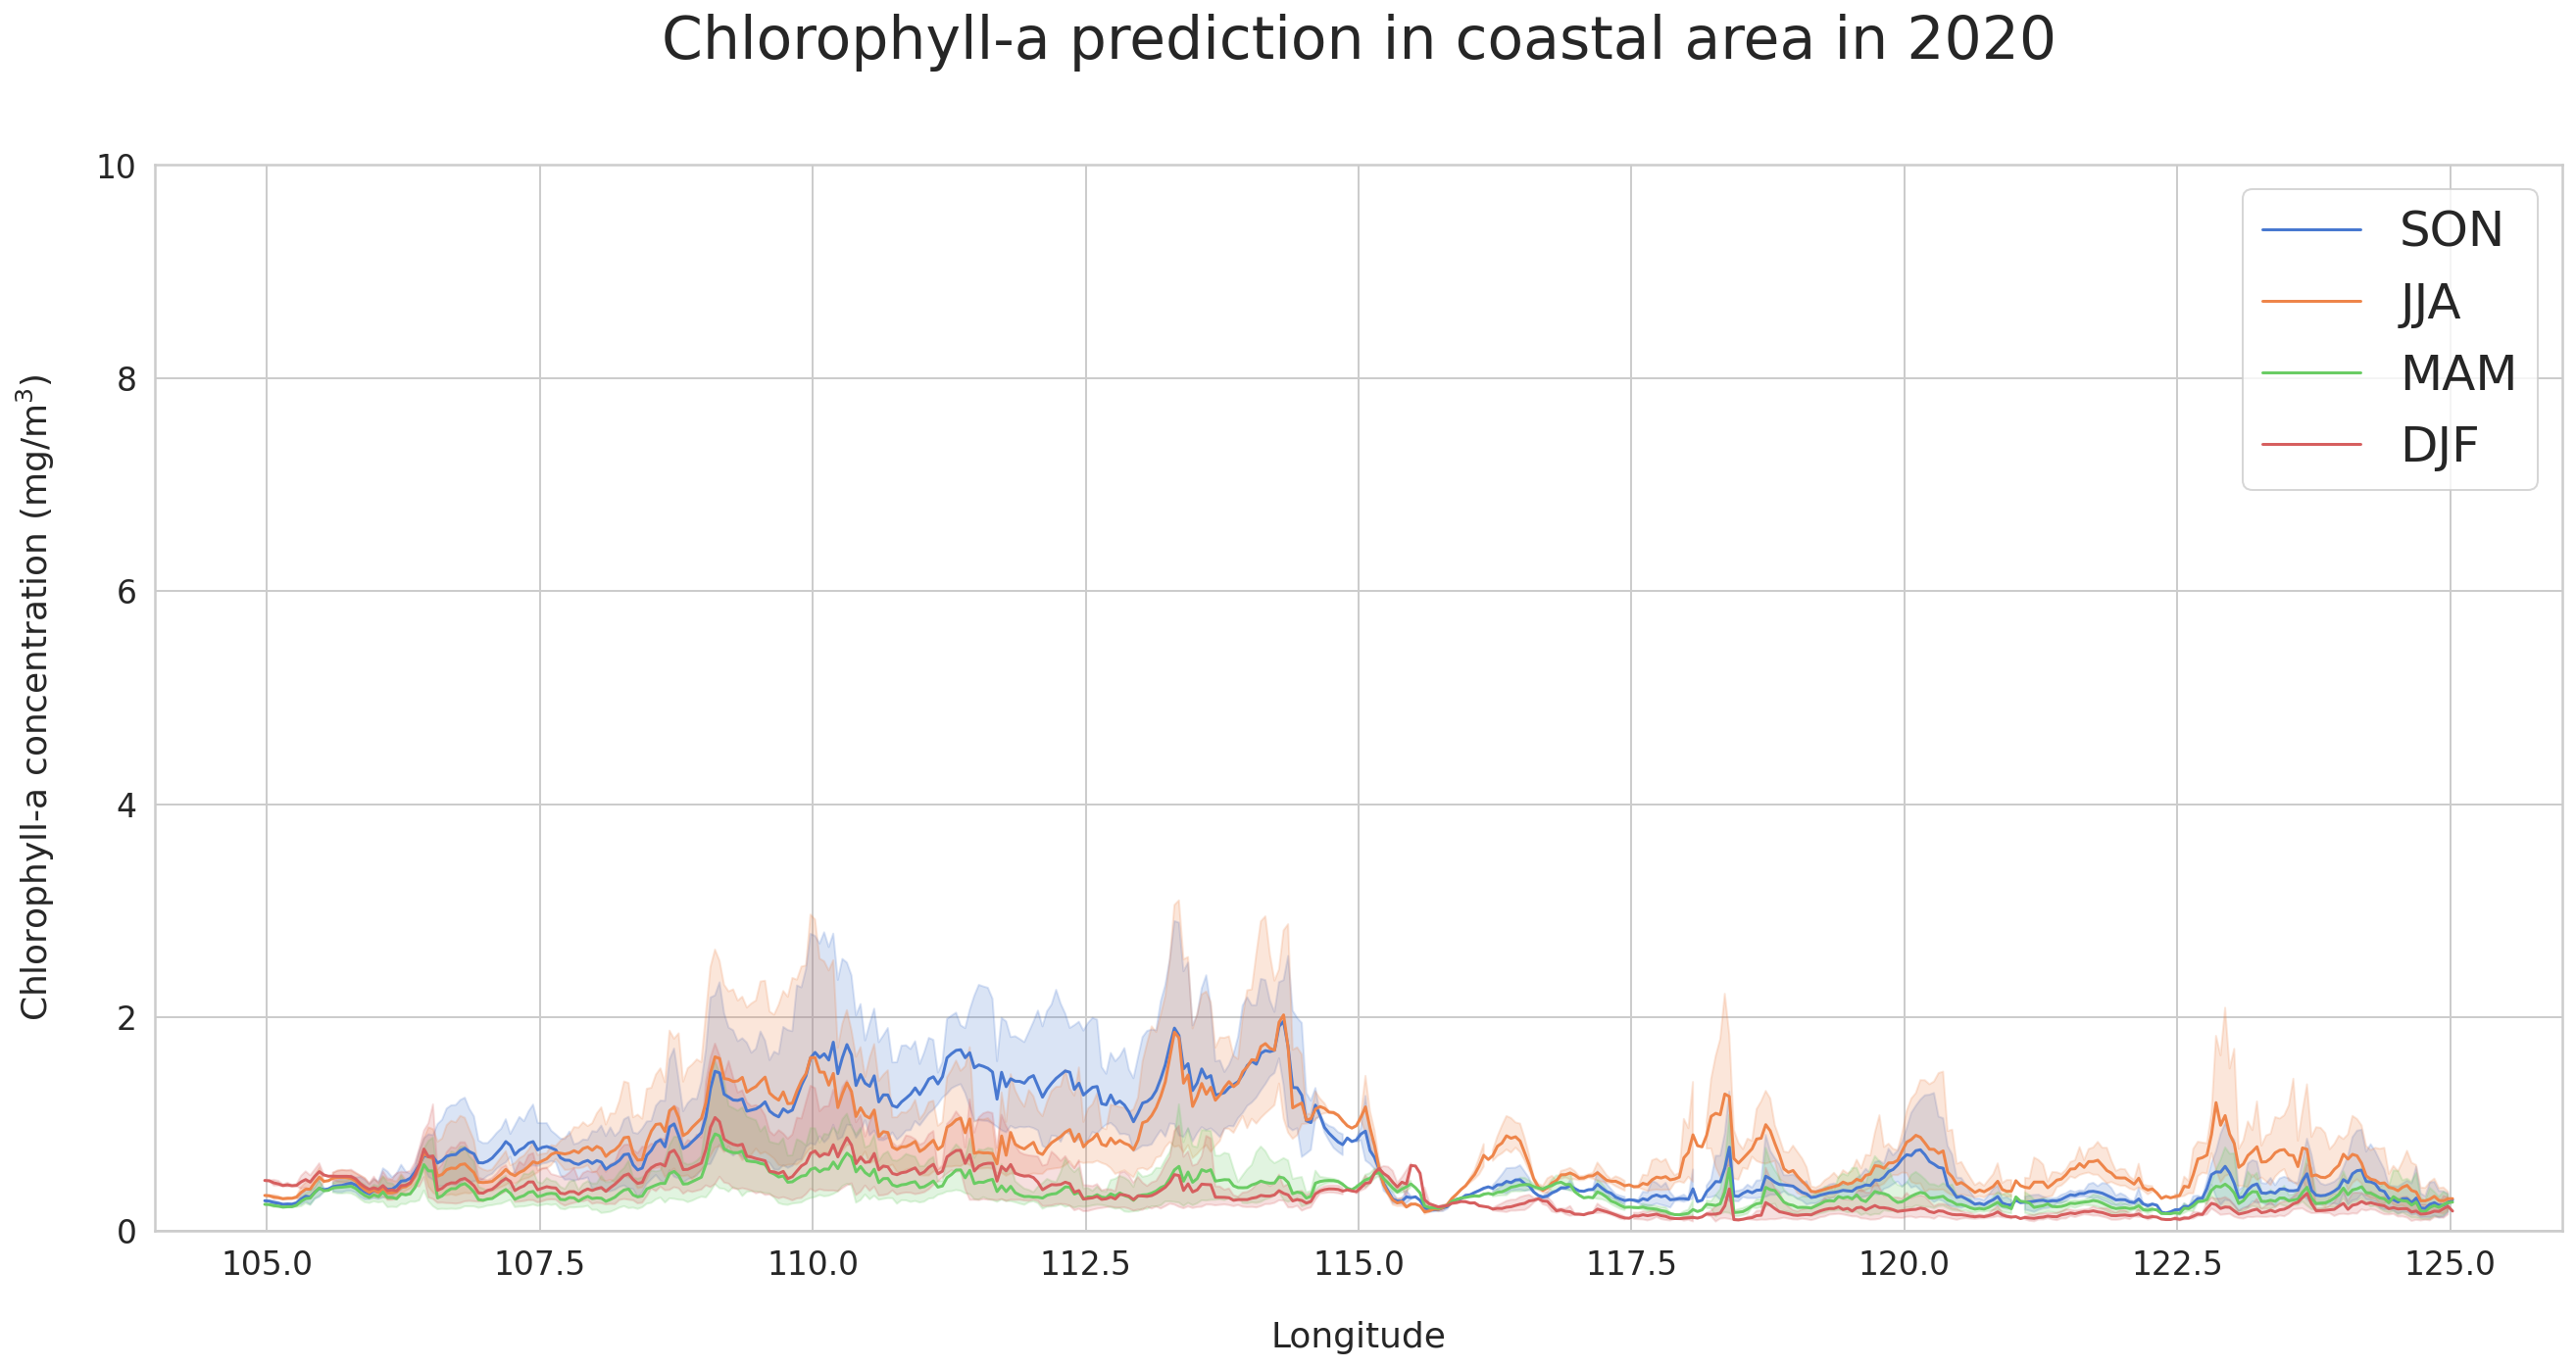

<Figure size 1584x720 with 0 Axes>

In [44]:
for i in ['2019','2020']:
  sns.lineplot(x = coastal['Longitude'], y = np.transpose(coastal_prediction['SON '+ i].values), ci=100, label='SON') #SON
  sns.lineplot(x = coastal['Longitude'], y = np.transpose(coastal_prediction['JJA '+ i].values), ci=100, label='JJA') #JJA
  sns.lineplot(x = coastal['Longitude'], y = np.transpose(coastal_prediction['MAM '+ i].values), ci=100, label='MAM') #MAM
  sns.lineplot(x = coastal['Longitude'], y = np.transpose(coastal_prediction['DJF '+ i].values), ci=100, label='DJF') #DJF
  plt.xlabel('Longitude')
  plt.ylabel('Chlorophyll-a concentration (mg/$\mathregular{m^3}$)')
  plt.title('Chlorophyll-a prediction in coastal area in {}\n'.format(i),
              fontsize=30)
  plt.legend(loc='upper right',prop={"size":25})
  plt.ylim(0,10)
  plt.savefig('./Graphs/Chlorophyll-a prediction in coastal area in {}.jpg'.format(i))
  plt.show()
  plt.clf()

##Ocean

In [42]:
ocean = pd.read_csv('./Coordinates/Data Coordinates in Ocean.csv', index_col='Titik')
ocean

X      Y   Latitude  Longitude
Titik                                      
1011.0     2.0    0.0  -6.770836  104.97917
1012.0     2.0    1.0  -6.770836  105.02084
1516.0     3.0    0.0  -6.812503  104.97917
1517.0     3.0    1.0  -6.812503  105.02084
1518.0     3.0    2.0  -6.812503  105.06251
...        ...    ...        ...        ...
64611.0  127.0  475.0 -11.979170  124.77084
64612.0  127.0  476.0 -11.979170  124.81251
64613.0  127.0  477.0 -11.979170  124.85418
64614.0  127.0  478.0 -11.979170  124.89584
64615.0  127.0  479.0 -11.979170  124.93751

[38304 rows x 4 columns]

In [45]:
ocean_prediction, ocean_actual =  ocean.copy(), ocean.copy()

for i in season:
  ocean_prediction.loc[ocean.index, i] = season_pred.loc[ocean.index, i]
  ocean_actual.loc[ocean.index, i] = season_actual.loc[ocean.index, i]

In [46]:
ocean_prediction

X      Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  \
Titik                                                                       
1011.0     2.0    0.0  -6.770836  104.97917  0.209894  0.251914  0.672269   
1012.0     2.0    1.0  -6.770836  105.02084  0.201114  0.242106  0.608168   
1516.0     3.0    0.0  -6.812503  104.97917  0.200259  0.239769  0.625862   
1517.0     3.0    1.0  -6.812503  105.02084  0.192321  0.231979  0.602574   
1518.0     3.0    2.0  -6.812503  105.06251  0.182202  0.221757  0.582996   
...        ...    ...        ...        ...       ...       ...       ...   
64611.0  127.0  475.0 -11.979170  124.77084  0.119171  0.142480  0.254470   
64612.0  127.0  476.0 -11.979170  124.81251  0.126881  0.150393  0.263790   
64613.0  127.0  477.0 -11.979170  124.85418  0.132761  0.156785  0.272771   
64614.0  127.0  478.0 -11.979170  124.89584  0.133895  0.157840  0.273425   
64615.0  127.0  479.0 -11.979170  124.93751  0.141001  0.164879  0.279912   

         SON 2019  DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                                      
1011.0   1.056105  0.465880  0.240706  0.322802  0.273328  
1012.0   0.928514  0.444050  0.230656  0.309782  0.261541  
1516.0   0.977659  0.445164  0.228550  0.306985  0.259986  
1517.0   0.934562  0.432539  0.220481  0.298182  0.250039  
1518.0   0.926114  0.418635  0.210806  0.288841  0.238936  
...           ...       ...       ...       ...       ...  
64611.0  0.164957  0.121824  0.137942  0.221221  0.143345  
64612.0  0.172882  0.129574  0.145887  0.229849  0.151029  
64613.0  0.179676  0.135503  0.152183  0.237933  0.157360  
64614.0  0.180179  0.136606  0.153225  0.238279  0.158148  
64615.0  0.186831  0.143665  0.160219  0.244572  0.164941  

[38304 rows x 12 columns]

In [47]:
ocean_actual

X      Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  \
Titik                                                                       
1011.0     2.0    0.0  -6.770836  104.97917  0.215093  0.247905  0.781400   
1012.0     2.0    1.0  -6.770836  105.02084  0.219353  0.249856  0.766813   
1516.0     3.0    0.0  -6.812503  104.97917  0.205741  0.242713  0.760420   
1517.0     3.0    1.0  -6.812503  105.02084  0.211885  0.247547  0.737311   
1518.0     3.0    2.0  -6.812503  105.06251  0.212707  0.251512  0.720321   
...        ...    ...        ...        ...       ...       ...       ...   
64611.0  127.0  475.0 -11.979170  124.77084  0.109549  0.129375  0.250021   
64612.0  127.0  476.0 -11.979170  124.81251  0.109607  0.129096  0.252458   
64613.0  127.0  477.0 -11.979170  124.85418  0.110857  0.129510  0.254904   
64614.0  127.0  478.0 -11.979170  124.89584  0.110071  0.129201  0.260147   
64615.0  127.0  479.0 -11.979170  124.93751  0.110008  0.131728  0.266517   

         SON 2019  DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                                      
1011.0   1.113418  0.585355  0.242194  0.365008  0.262696  
1012.0   1.046701  0.574912  0.249700  0.362754  0.271746  
1516.0   1.036850  0.550551  0.236849  0.355822  0.256726  
1517.0   0.994123  0.528425  0.240995  0.356120  0.263514  
1518.0   0.962126  0.506648  0.246059  0.357319  0.270265  
...           ...       ...       ...       ...       ...  
64611.0  0.138103  0.108420  0.122337  0.199693  0.120739  
64612.0  0.137763  0.109859  0.124419  0.207338  0.122064  
64613.0  0.137532  0.111994  0.127638  0.217337  0.122819  
64614.0  0.138133  0.113895  0.129471  0.216338  0.120756  
64615.0  0.137635  0.115577  0.133509  0.217321  0.119365  

[38304 rows x 12 columns]

In [50]:
ocean_prediction[season].describe().T.round(3)

count   mean    std    min    25%    50%    75%    max
DJF 2019  38304.0  0.098  0.032  0.027  0.077  0.095  0.113  0.291
MAM 2019  38304.0  0.147  0.064  0.035  0.107  0.128  0.167  0.614
JJA 2019  38304.0  0.374  0.194  0.066  0.239  0.306  0.463  1.823
SON 2019  38304.0  0.296  0.258  0.041  0.161  0.205  0.330  2.758
DJF 2020  38304.0  0.114  0.050  0.030  0.086  0.103  0.125  0.648
MAM 2020  38304.0  0.135  0.061  0.032  0.097  0.120  0.155  0.645
JJA 2020  38304.0  0.261  0.113  0.061  0.188  0.226  0.314  1.279
SON 2020  38304.0  0.202  0.106  0.050  0.141  0.170  0.227  1.271

In [51]:
ocean_actual[season].describe().T.round(3)

count   mean    std    min    25%    50%    75%    max
DJF 2019  38304.0  0.101  0.025  0.064  0.087  0.092  0.109  0.301
MAM 2019  38304.0  0.156  0.069  0.099  0.115  0.129  0.173  0.765
JJA 2019  38304.0  0.413  0.207  0.181  0.263  0.347  0.514  1.978
SON 2019  38304.0  0.319  0.288  0.122  0.162  0.213  0.360  2.814
DJF 2020  38304.0  0.120  0.051  0.076  0.094  0.102  0.125  0.807
MAM 2020  38304.0  0.142  0.065  0.083  0.103  0.119  0.155  0.719
JJA 2020  38304.0  0.274  0.117  0.134  0.195  0.236  0.327  1.475
SON 2020  38304.0  0.207  0.119  0.113  0.136  0.168  0.230  1.306

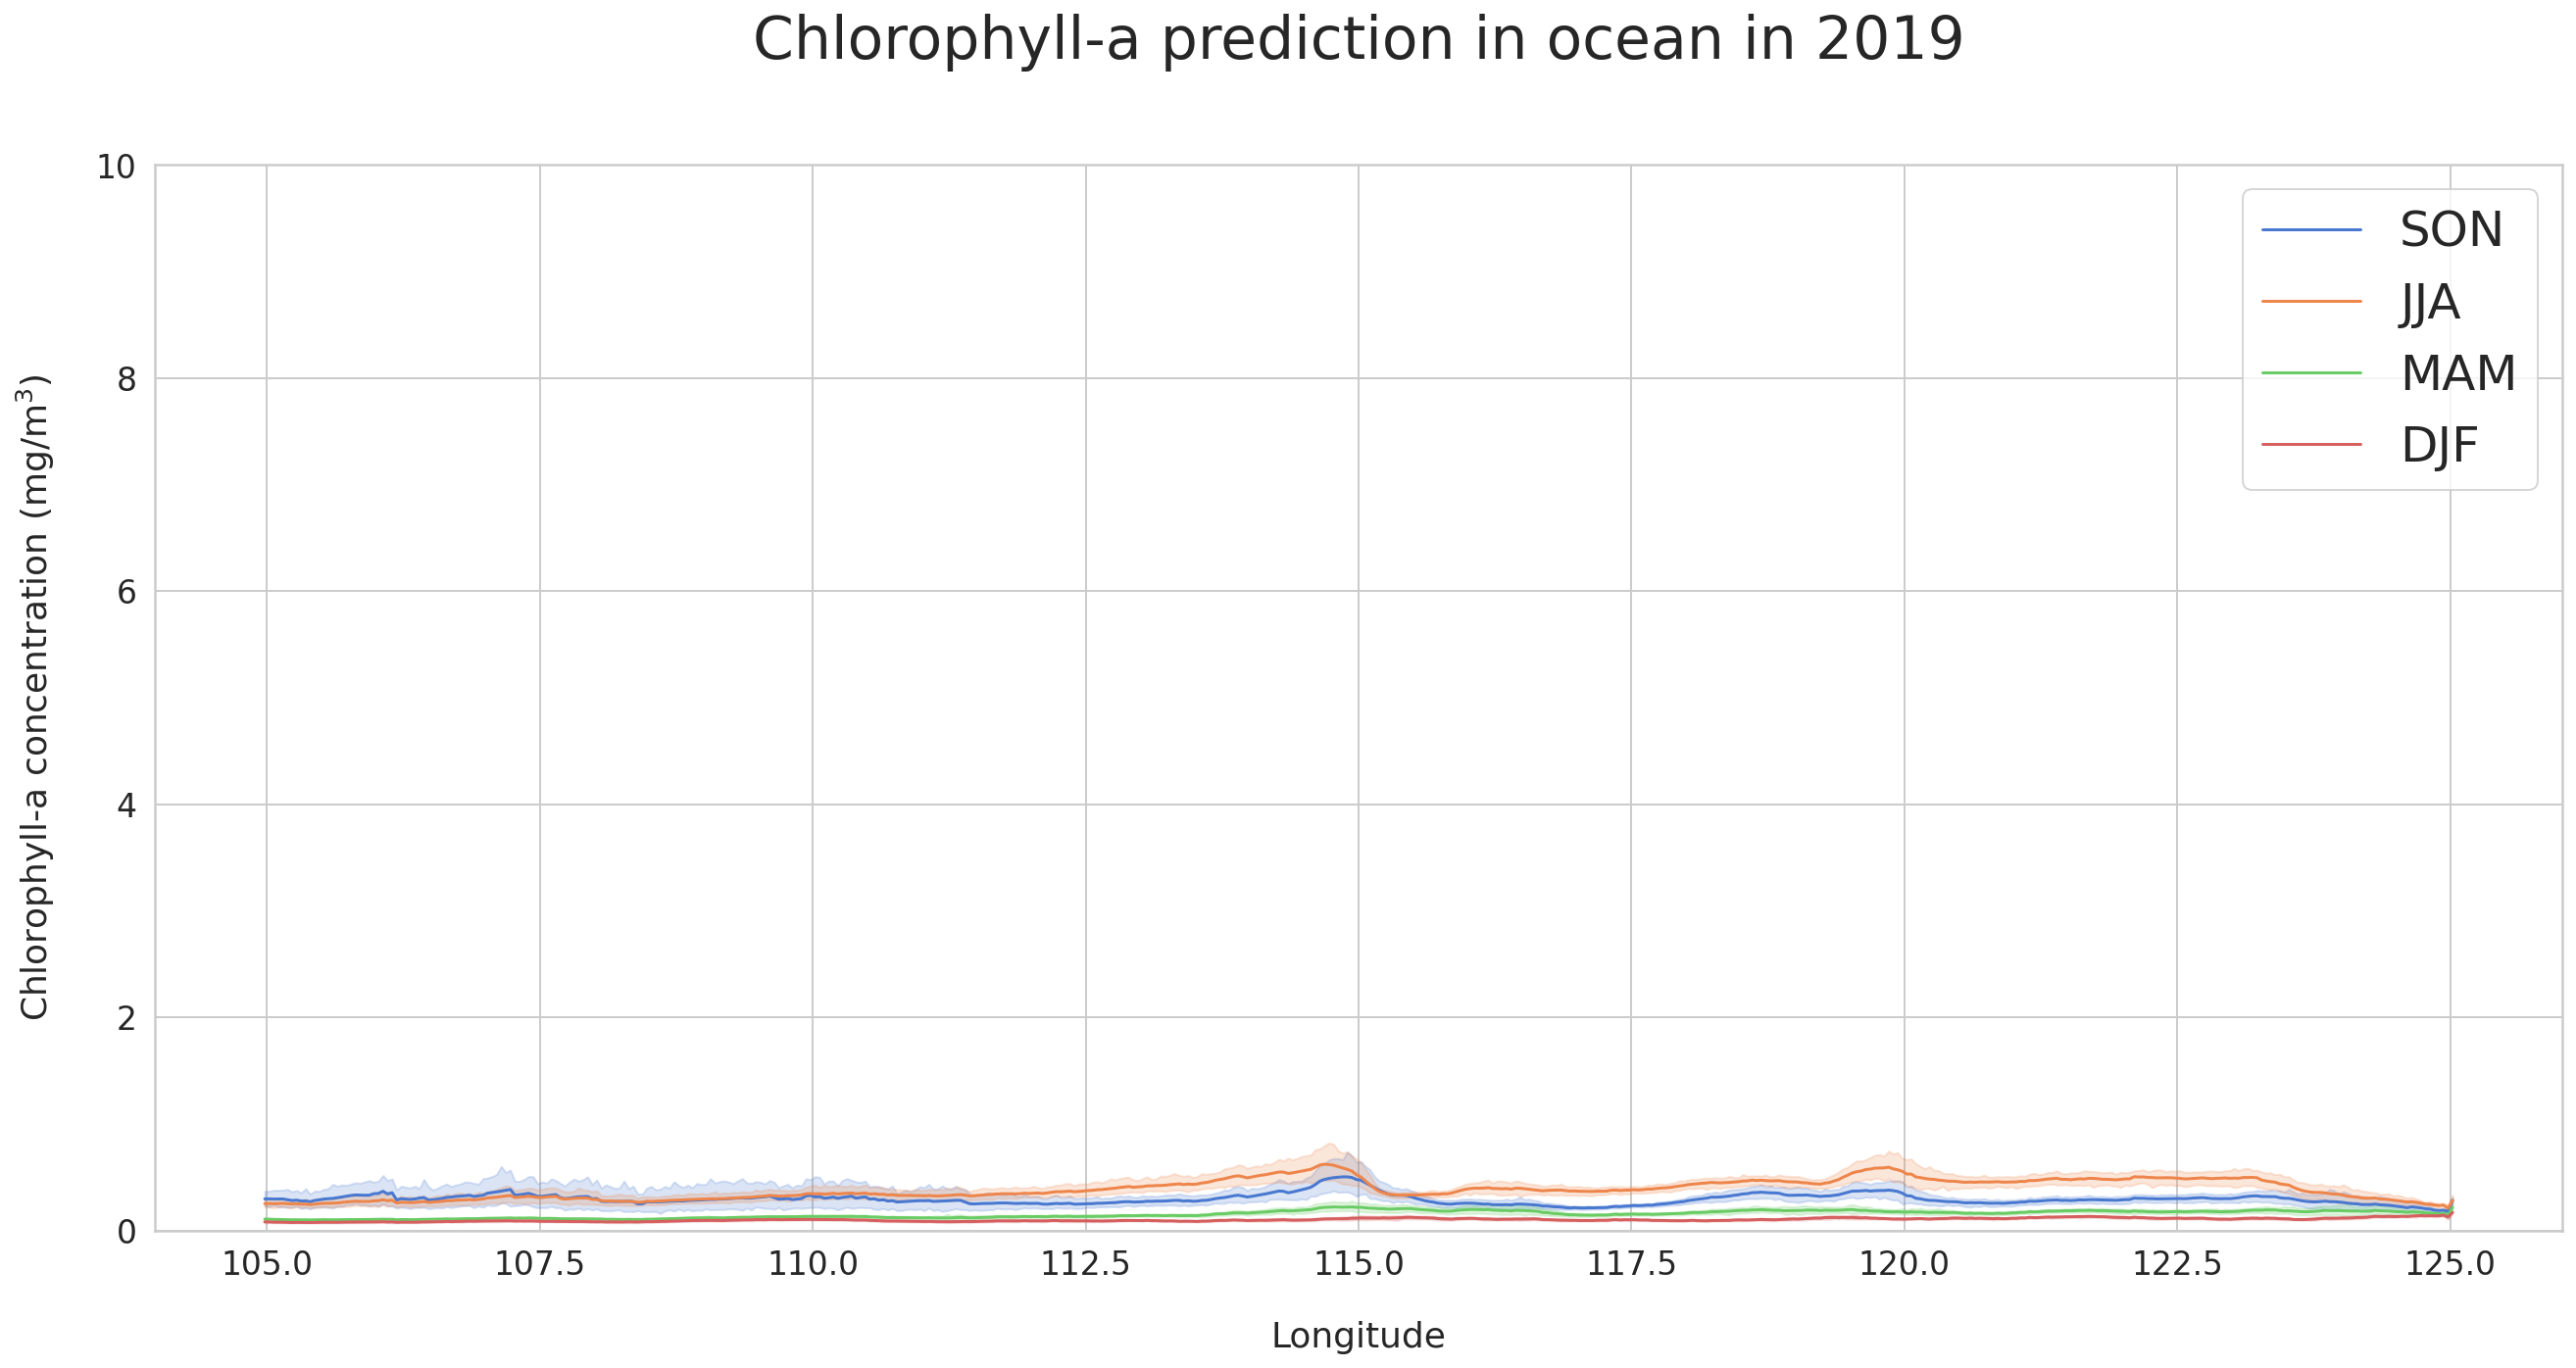

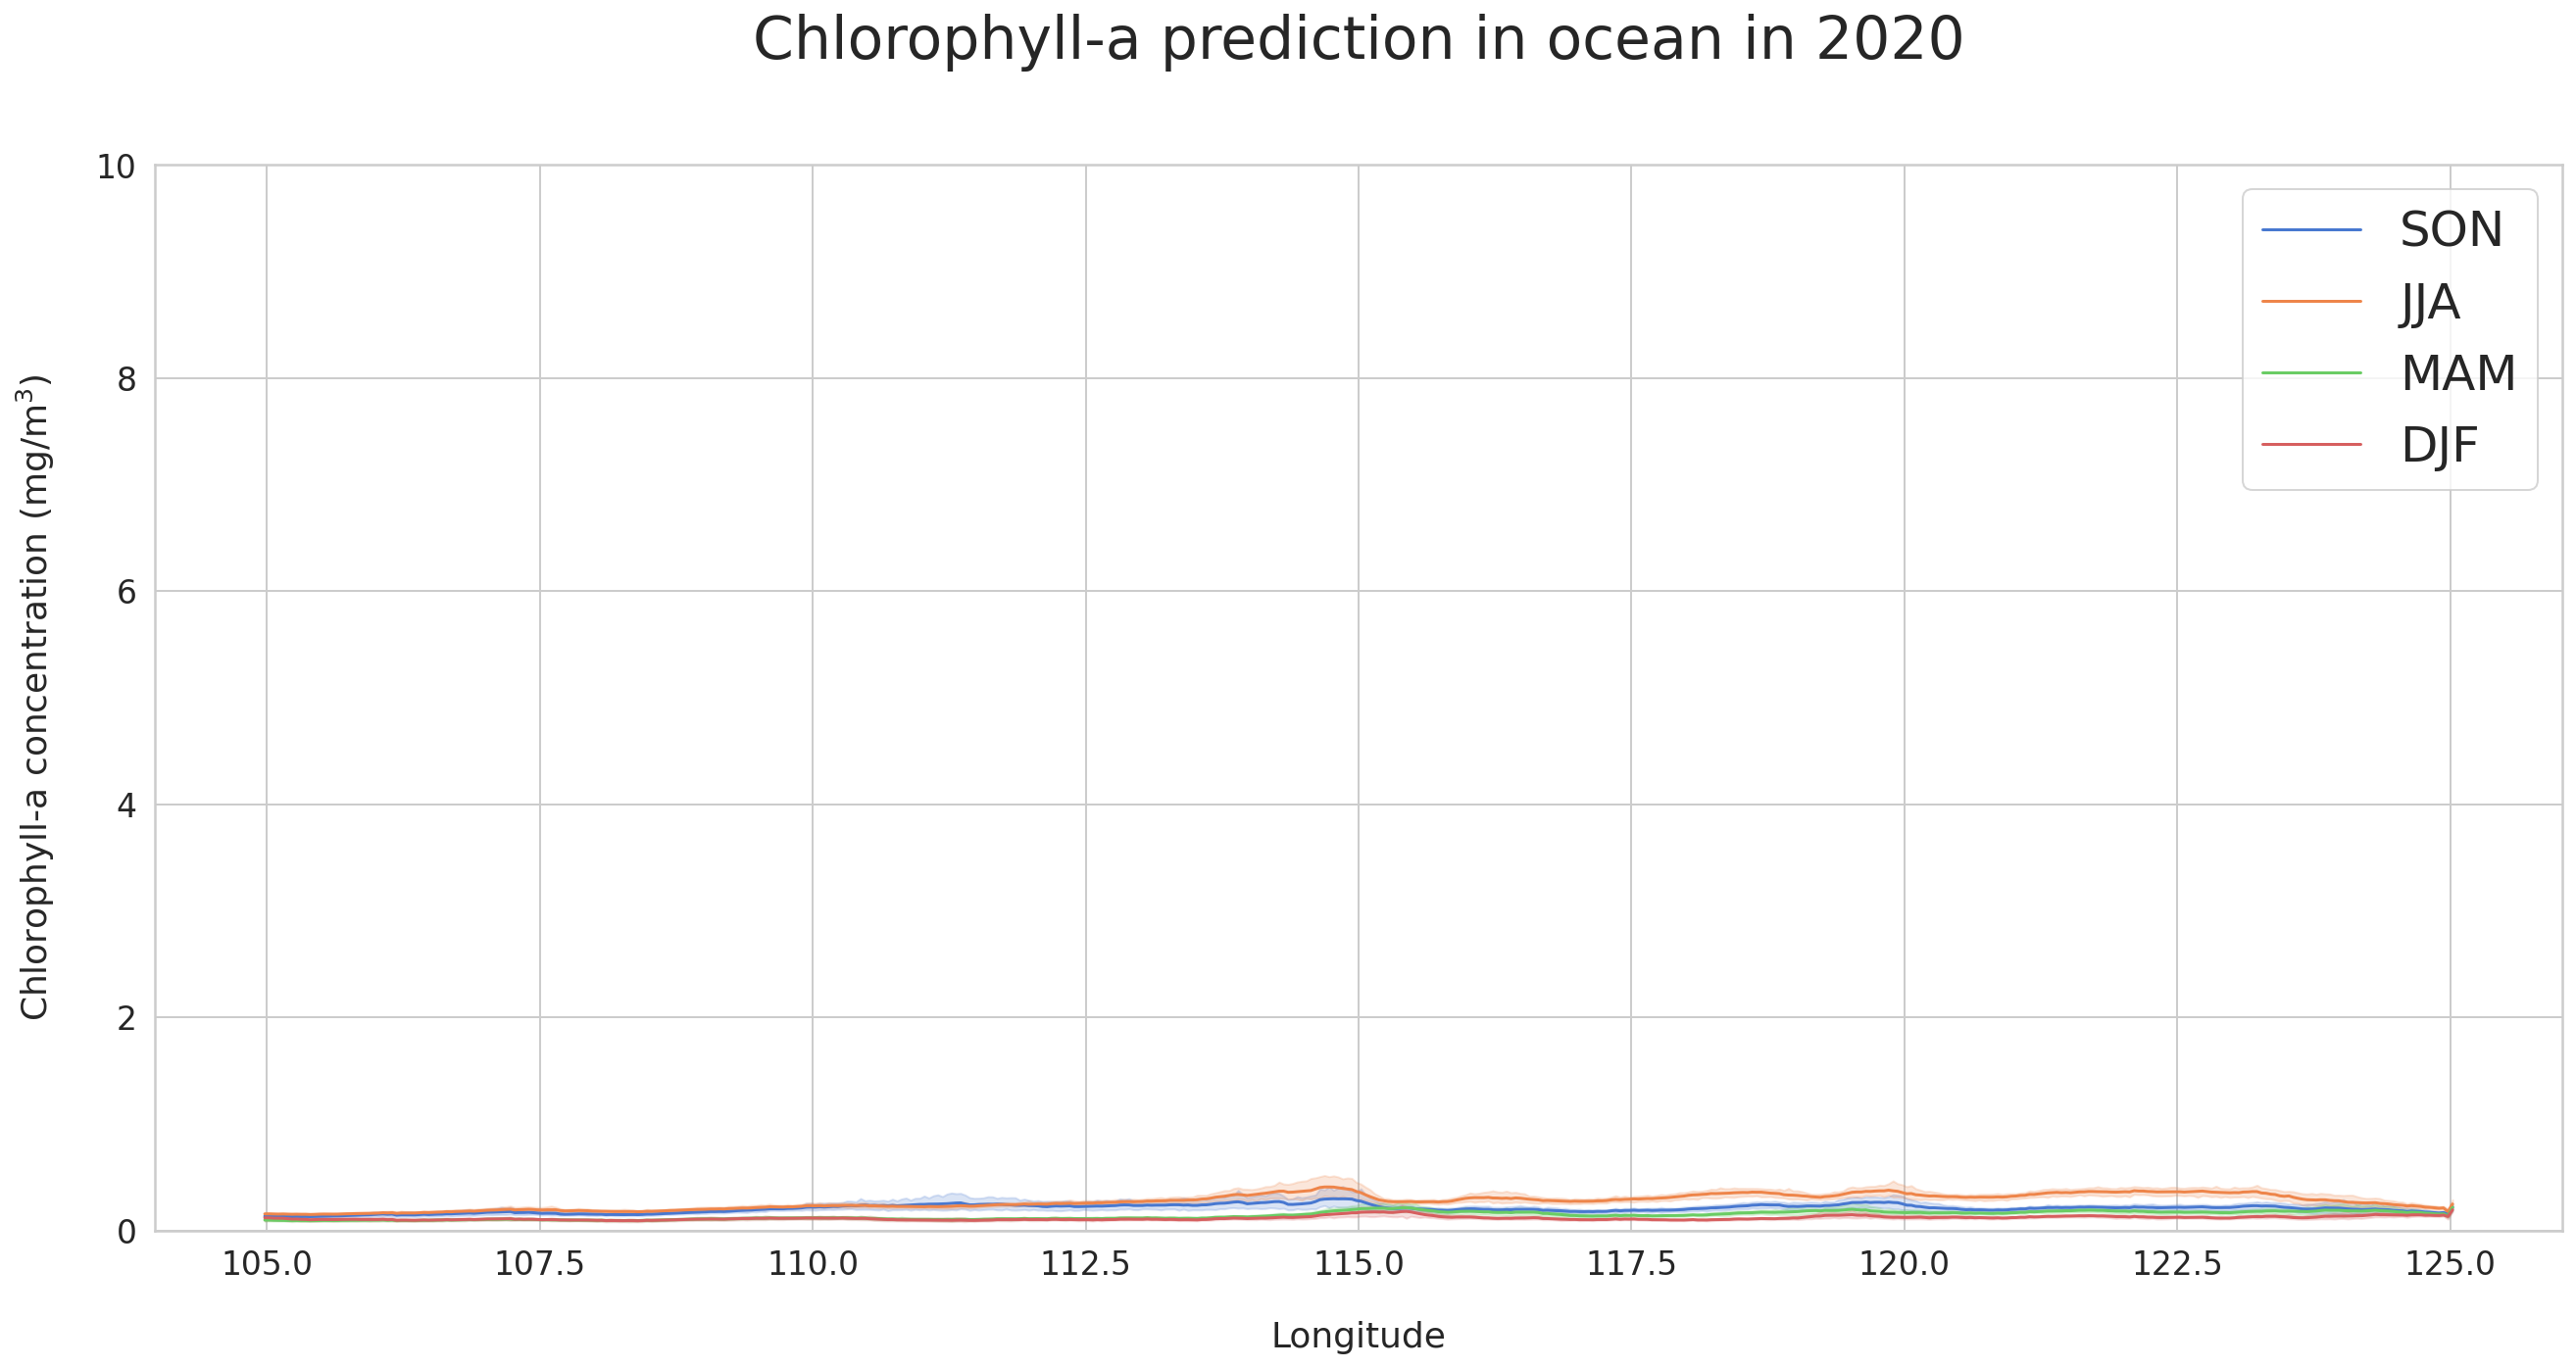

<Figure size 1584x720 with 0 Axes>

In [52]:
for i in ['2019','2020']:
  sns.lineplot(x = ocean['Longitude'], y = np.transpose(ocean_prediction['SON '+ i].values), ci=100, label='SON') #SON
  sns.lineplot(x = ocean['Longitude'], y = np.transpose(ocean_prediction['JJA '+ i].values), ci=100, label='JJA') #DJF
  sns.lineplot(x = ocean['Longitude'], y = np.transpose(ocean_prediction['MAM '+ i].values), ci=100, label='MAM') #JJA
  sns.lineplot(x = ocean['Longitude'], y = np.transpose(ocean_prediction['DJF '+ i].values), ci=100, label='DJF') #JJA
  plt.xlabel('Longitude')
  plt.ylabel('Chlorophyll-a concentration (mg/$\mathregular{m^3}$)')
  plt.title('Chlorophyll-a prediction in ocean in {}\n'.format(i),
              fontsize=30)
  plt.legend(loc='upper right',prop={"size":25})
  plt.ylim(0,10)
  plt.savefig('./Graphs/Chlorophyll-a prediction in ocean in {}.jpg'.format(i))
  plt.show()
  plt.clf()

##RMSE

In [24]:
#2019

#DJF 2019
rmse_djf_2019 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([djf_2019_actual[col].values.mean()], [djf_2019_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_djf_2019.loc[0] = rmse

#MAM 2019
rmse_mam_2019 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([mam_2019_actual[col].values.mean()], [mam_2019_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_mam_2019.loc[0] = rmse

#JJA 2019
rmse_jja_2019 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([jja_2019_actual[col].values.mean()], [jja_2019_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_jja_2019.loc[0] = rmse

#SON 2019
rmse_son_2019 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([son_2019_actual[col].values.mean()], [son_2019_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_son_2019.loc[0] = rmse

In [25]:
#2020

#DJF 2020
rmse_djf_2020 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([djf_2020_actual[col].values.mean()], [djf_2020_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_djf_2020.loc[0] = rmse

#MAM 2020
rmse_mam_2020 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([mam_2020_actual[col].values.mean()], [mam_2020_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_mam_2020.loc[0] = rmse

#JJA 2020
rmse_jja_2020 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([jja_2020_actual[col].values.mean()], [jja_2020_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_jja_2020.loc[0] = rmse

#SON 2020
rmse_son_2020 = pd.DataFrame(columns=np.arange(1,41165))

rmse = []
for j in range(1,41165):
  col = str(j)
  c = mean_squared_error([son_2020_actual[col].values.mean()], [son_2020_pred[col].values.mean()], squared=False)
  rmse.append(c)

rmse_son_2020.loc[0] = rmse

In [26]:
rmse_season = coordinates.copy()

rmse_season['DJF 2019'] = rmse_djf_2019.values.T
rmse_season['MAM 2019'] = rmse_mam_2019.values.T
rmse_season['JJA 2019'] = rmse_jja_2019.values.T
rmse_season['SON 2019'] = rmse_son_2019.values.T

rmse_season['DJF 2020'] = rmse_djf_2020.values.T
rmse_season['MAM 2020'] = rmse_mam_2020.values.T
rmse_season['JJA 2020'] = rmse_jja_2020.values.T
rmse_season['SON 2020'] = rmse_son_2020.values.T

In [27]:
rmse_season

X      Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  \
Titik                                                                       
1.0        0.0    0.0  -6.687503  104.97917  0.018865  0.003501  0.098696   
2.0        0.0    1.0  -6.687503  105.02084  0.018123  0.005272  0.066877   
3.0        0.0    2.0  -6.687503  105.06251  0.017276  0.006662  0.044817   
4.0        0.0    3.0  -6.687503  105.10417  0.024951  0.019940  0.059025   
5.0        0.0    4.0  -6.687503  105.14584  0.044619  0.045179  0.124641   
...        ...    ...        ...        ...       ...       ...       ...   
64611.0  127.0  475.0 -11.979170  124.77084  0.009622  0.013105  0.004449   
64612.0  127.0  476.0 -11.979170  124.81251  0.017274  0.021297  0.011333   
64613.0  127.0  477.0 -11.979170  124.85418  0.021903  0.027275  0.017867   
64614.0  127.0  478.0 -11.979170  124.89584  0.023824  0.028639  0.013278   
64615.0  127.0  479.0 -11.979170  124.93751  0.030992  0.033151  0.013395   

         SON 2019  DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                                      
1.0      0.141203  0.164560  0.017116  0.057078  0.003385  
2.0      0.193558  0.180585  0.010646  0.059541  0.004004  
3.0      0.237997  0.140039  0.012488  0.054966  0.011970  
4.0      0.252910  0.121447  0.029762  0.060659  0.026161  
5.0      0.352927  0.155178  0.054966  0.080603  0.045713  
...           ...       ...       ...       ...       ...  
64611.0  0.026855  0.013404  0.015605  0.021528  0.022606  
64612.0  0.035119  0.019716  0.021469  0.022511  0.028965  
64613.0  0.042144  0.023509  0.024544  0.020596  0.034541  
64614.0  0.042046  0.022711  0.023754  0.021941  0.037392  
64615.0  0.049197  0.028088  0.026710  0.027251  0.045576  

[41164 rows x 12 columns]

In [29]:
rmse_season[season].describe().T

count      mean       std           min       25%       50%  \
DJF 2019  41164.0  0.019158  0.017765  2.966913e-07  0.007280  0.015024   
MAM 2019  41164.0  0.026960  0.036362  4.774658e-07  0.008920  0.018618   
JJA 2019  41164.0  0.064965  0.096486  1.429866e-06  0.014975  0.038002   
SON 2019  41164.0  0.062350  0.106548  1.719944e-06  0.012511  0.028134   
DJF 2020  41164.0  0.022634  0.023257  8.291014e-07  0.008190  0.017340   
MAM 2020  41164.0  0.024043  0.029226  3.199272e-07  0.007401  0.016192   
JJA 2020  41164.0  0.032855  0.046581  4.060766e-08  0.009050  0.020501   
SON 2020  41164.0  0.031518  0.042872  1.329328e-07  0.008908  0.019770   

               75%       max  
DJF 2019  0.026519  0.606266  
MAM 2019  0.034740  1.198949  
JJA 2019  0.082337  3.097984  
SON 2019  0.066251  1.936536  
DJF 2020  0.030604  0.580436  
MAM 2020  0.031330  0.674928  
JJA 2020  0.041246  1.087638  
SON 2020  0.038035  0.959963

In [30]:
rmse_season.to_csv('./Seasonal RMSE.csv')

##MBE

In [11]:
#DJF 2019
mbe_djf_2019 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(djf_2019_pred[col].values.mean() - djf_2019_actual[col].values.mean())
  mbe.append(c)

mbe_djf_2019.loc[0] = mbe

#MAM 2019
mbe_mam_2019 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(mam_2019_pred[col].values.mean() - mam_2019_actual[col].values.mean())
  mbe.append(c)

mbe_mam_2019.loc[0] = mbe

#JJA 2019
mbe_jja_2019 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(jja_2019_pred[col].values.mean() - jja_2019_actual[col].values.mean())
  mbe.append(c)

mbe_jja_2019.loc[0] = mbe

#SON 2019
mbe_son_2019 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(son_2019_pred[col].values.mean() - son_2019_actual[col].values.mean())
  mbe.append(c)

mbe_son_2019.loc[0] = mbe

In [12]:
#DJF 2020
mbe_djf_2020 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(djf_2020_pred[col].values.mean() - djf_2020_actual[col].values.mean())
  mbe.append(c)

mbe_djf_2020.loc[0] = mbe

#MAM 2020
mbe_mam_2020 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(mam_2020_pred[col].values.mean() - mam_2020_actual[col].values.mean())
  mbe.append(c)

mbe_mam_2020.loc[0] = mbe

#JJA 2020
mbe_jja_2020 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(jja_2020_pred[col].values.mean() - jja_2020_actual[col].values.mean())
  mbe.append(c)

mbe_jja_2020.loc[0] = mbe

#SON 2020
mbe_son_2020 = pd.DataFrame(columns=np.arange(1,41165))

mbe = []
for j in range(1,41165):
  col = str(j)
  c = np.mean(son_2020_pred[col].values.mean() - son_2020_actual[col].values.mean())
  mbe.append(c)

mbe_son_2020.loc[0] = mbe

In [31]:
mbe_season = coordinates.copy()

mbe_season['DJF 2019'] = mbe_djf_2019.values.T
mbe_season['MAM 2019'] = mbe_mam_2019.values.T
mbe_season['JJA 2019'] = mbe_jja_2019.values.T
mbe_season['SON 2019'] = mbe_son_2019.values.T

mbe_season['DJF 2020'] = mbe_djf_2020.values.T
mbe_season['MAM 2020'] = mbe_mam_2020.values.T
mbe_season['JJA 2020'] = mbe_jja_2020.values.T
mbe_season['SON 2020'] = mbe_son_2020.values.T

In [32]:
mbe_season

X      Y   Latitude  Longitude  DJF 2019  MAM 2019  JJA 2019  \
Titik                                                                       
1.0        0.0    0.0  -6.687503  104.97917 -0.018865 -0.003501 -0.098696   
2.0        0.0    1.0  -6.687503  105.02084 -0.018123 -0.005272 -0.066877   
3.0        0.0    2.0  -6.687503  105.06251 -0.017276 -0.006662 -0.044817   
4.0        0.0    3.0  -6.687503  105.10417 -0.024951 -0.019940 -0.059025   
5.0        0.0    4.0  -6.687503  105.14584 -0.044619 -0.045179 -0.124641   
...        ...    ...        ...        ...       ...       ...       ...   
64611.0  127.0  475.0 -11.979170  124.77084  0.009622  0.013105  0.004449   
64612.0  127.0  476.0 -11.979170  124.81251  0.017274  0.021297  0.011333   
64613.0  127.0  477.0 -11.979170  124.85418  0.021903  0.027275  0.017867   
64614.0  127.0  478.0 -11.979170  124.89584  0.023824  0.028639  0.013278   
64615.0  127.0  479.0 -11.979170  124.93751  0.030992  0.033151  0.013395   

         SON 2019  DJF 2020  MAM 2020  JJA 2020  SON 2020  
Titik                                                      
1.0     -0.141203 -0.164560 -0.017116 -0.057078  0.003385  
2.0     -0.193558 -0.180585 -0.010646 -0.059541 -0.004004  
3.0     -0.237997 -0.140039 -0.012488 -0.054966 -0.011970  
4.0     -0.252910 -0.121447 -0.029762 -0.060659 -0.026161  
5.0     -0.352927 -0.155178 -0.054966 -0.080603 -0.045713  
...           ...       ...       ...       ...       ...  
64611.0  0.026855  0.013404  0.015605  0.021528  0.022606  
64612.0  0.035119  0.019716  0.021469  0.022511  0.028965  
64613.0  0.042144  0.023509  0.024544  0.020596  0.034541  
64614.0  0.042046  0.022711  0.023754  0.021941  0.037392  
64615.0  0.049197  0.028088  0.026710  0.027251  0.045576  

[41164 rows x 12 columns]

In [33]:
mbe_season[season].describe().T.round(3)

count   mean    std    min    25%    50%    75%    max
DJF 2019  41164.0 -0.004  0.026 -0.606 -0.019 -0.002  0.012  0.269
MAM 2019  41164.0 -0.013  0.043 -1.199 -0.029 -0.008  0.010  0.295
JJA 2019  41164.0 -0.043  0.108 -3.098 -0.073 -0.029 -0.003  1.846
SON 2019  41164.0 -0.029  0.120 -1.937 -0.050 -0.005  0.018  1.570
DJF 2020  41164.0 -0.006  0.032 -0.580 -0.023 -0.003  0.013  0.493
MAM 2020  41164.0 -0.008  0.037 -0.675 -0.024 -0.004  0.011  0.556
JJA 2020  41164.0 -0.014  0.055 -1.088 -0.033 -0.008  0.010  0.923
SON 2020  41164.0 -0.006  0.053 -0.960 -0.022 -0.000  0.018  0.712

In [34]:
mbe_season.to_csv('./Seasonal MBE.csv')